In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('churn_prediction.csv')

In [3]:
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

In [4]:
data.shape

(28382, 21)

In [5]:
## This data contains data of 28382 customers

In [6]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [7]:
len(data.columns)

21

In [8]:
## there are 21 variables

In [9]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [10]:
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [11]:
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['churn'] = data['churn'].astype('category')

In [12]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [13]:
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [14]:
data.city = data.city.astype('category')
data.dependents = data.dependents.astype('category')

In [15]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                        category
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [16]:
data.dtypes[data.dtypes == 'object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [17]:
data[['gender', 'occupation', 'last_transaction']].head(10)

gender     occupation last_transaction
0    Male  self_employed       2019-05-21
1    Male  self_employed       2019-11-01
2    Male       salaried              NaT
3     NaN  self_employed       2019-08-06
4    Male  self_employed       2019-11-03
5  Female  self_employed       2019-11-01
6    Male        retired       2019-09-24
7    Male  self_employed       2019-07-12
8    Male       salaried       2019-12-12
9    Male  self_employed       2019-12-31

In [18]:
## typecasting gender and occupation as categorical variables

data.gender = data.gender.astype('category')
data.occupation = data.occupation.astype('category')

In [19]:
date = pd.DatetimeIndex(data.last_transaction)

In [20]:
## extracting day of year

data['doy_ls_trans'] = date.dayofyear

## extracting month of year

data['moy_ls_trans'] = date.month

## extracting week of year

data['woy_ls_trans'] = date.weekofyear

## extracting day of week

data['dow_ls_trans'] = date.dayofweek


<ipython-input-20-45c2db93fc77>:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['woy_ls_trans'] = date.weekofyear


In [21]:
data[['last_transaction', 'doy_ls_trans', 'moy_ls_trans', 'woy_ls_trans', 'dow_ls_trans']]

last_transaction  doy_ls_trans  moy_ls_trans  woy_ls_trans  dow_ls_trans
0           2019-05-21         141.0           5.0          21.0           1.0
1           2019-11-01         305.0          11.0          44.0           4.0
2                  NaT           NaN           NaN           NaN           NaN
3           2019-08-06         218.0           8.0          32.0           1.0
4           2019-11-03         307.0          11.0          44.0           6.0
...                ...           ...           ...           ...           ...
28377       2019-10-22         295.0          10.0          43.0           1.0
28378       2019-12-17         351.0          12.0          51.0           1.0
28379       2019-12-31         365.0          12.0           1.0           1.0
28380              NaT           NaN           NaN           NaN           NaN
28381       2019-11-02         306.0          11.0          44.0           5.0

[28382 rows x 5 columns]

In [22]:
## isolating numerical columns

In [23]:
numerical_cols = data.select_dtypes( include = ['int64', 'float64']).columns

In [24]:
numerical_cols

Index(['customer_id', 'vintage', 'age', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'doy_ls_trans',
       'moy_ls_trans', 'woy_ls_trans', 'dow_ls_trans'],
      dtype='object')

In [25]:
## person with minimum current balance
data.loc[data.current_month_balance == data.current_month_balance.min()]

customer_id  vintage  age  gender dependents occupation   city  \
1375         1470     2260   69  Female        0.0    retired  649.0   

     customer_nw_category branch_code  current_balance  ...  \
1375                    2          54         -5213.02  ...   

      current_month_debit  previous_month_debit  current_month_balance  \
1375               3229.0                  0.43               -3374.18   

      previous_month_balance  churn  last_transaction  doy_ls_trans  \
1375                26616.49      0        2019-10-15         288.0   

      moy_ls_trans  woy_ls_trans dow_ls_trans  
1375          10.0          42.0          1.0  

[1 rows x 25 columns]

In [26]:
# person with maximum current balance
data.loc[data.current_month_balance == data.current_month_balance.max()]

customer_id  vintage  age gender dependents     occupation   city  \
9908        10575     2223   90    NaN        NaN  self_employed  243.0   

     customer_nw_category branch_code  current_balance  ...  \
9908                    2        2542       5905904.03  ...   

      current_month_debit  previous_month_debit  current_month_balance  \
9908             17327.27               17248.3             5778184.77   

      previous_month_balance  churn  last_transaction  doy_ls_trans  \
9908               5720144.5      0        2019-12-13         347.0   

      moy_ls_trans  woy_ls_trans dow_ls_trans  
9908          12.0          50.0          4.0  

[1 rows x 25 columns]

In [27]:
print('Range of age is {0} to {1}'.format(data.age.min(), data.age.max()))

Range of age is 1 to 90


In [28]:
## max of each numerical col
data[numerical_cols].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_ls_trans                           365.00
moy_ls_trans                            12.00
woy_ls_trans                            52.00
dow_ls_trans                             6.00
dtype: float64

In [29]:
## minimum of each numerical col
data[numerical_cols].min()

customer_id                           1.00
vintage                              73.00
age                                   1.00
current_balance                   -5503.96
previous_month_end_balance        -3149.57
average_monthly_balance_prevQ      1428.69
average_monthly_balance_prevQ2   -16506.10
current_month_credit                  0.01
previous_month_credit                 0.01
current_month_debit                   0.01
previous_month_debit                  0.01
current_month_balance             -3374.18
previous_month_balance            -5171.92
doy_ls_trans                          1.00
moy_ls_trans                          1.00
woy_ls_trans                          1.00
dow_ls_trans                          0.00
dtype: float64

In [30]:
## range of each variable

for i in numerical_cols:
    print('Range of {0} is [{1}, {2}]'.format(i, data[i].min(), data[i].max()))

Range of customer_id is [1, 30301]
Range of vintage is [73, 2476]
Range of age is [1, 90]
Range of current_balance is [-5503.96, 5905904.03]
Range of previous_month_end_balance is [-3149.57, 5740438.63]
Range of average_monthly_balance_prevQ is [1428.69, 5700289.57]
Range of average_monthly_balance_prevQ2 is [-16506.1, 5010170.1]
Range of current_month_credit is [0.01, 12269845.39]
Range of previous_month_credit is [0.01, 2361808.29]
Range of current_month_debit is [0.01, 7637857.36]
Range of previous_month_debit is [0.01, 1414168.06]
Range of current_month_balance is [-3374.18, 5778184.77]
Range of previous_month_balance is [-5171.92, 5720144.5]
Range of doy_ls_trans is [1.0, 365.0]
Range of moy_ls_trans is [1.0, 12.0]
Range of woy_ls_trans is [1.0, 52.0]
Range of dow_ls_trans is [0.0, 6.0]


In [31]:
print('Mean of ages of all customers: {}'.format(data.age.mean()))
print('Mean of ages of only churning customers: {}'.format(data.loc[data.churn == 1, 'age'].mean()))

Mean of ages of all customers: 48.208336269466564
Mean of ages of only churning customers: 47.461216730038025


In [32]:
print('Mean of current balance of all the customers: {}'.format(data.current_balance.mean()))
print('Mean of current balance of churning customers: {}'.format( data.loc[ data.churn == 1, 'current_balance'].mean() ))

Mean of current balance of all the customers: 7380.551803607912
Mean of current balance of churning customers: 5220.884321292768


In [33]:
print('Median Age: {}'.format(data.age.median()))

Median Age: 46.0


In [34]:
print('Variance of current balance is: {} and standard deviation of current balance is: {}'.format(data.current_balance.var(), data.current_balance.std()))

Variance of current balance is: 1814650257.5186183 and standard deviation of current balance is: 42598.71192323329


In [35]:
data.describe(include = [int, float])

current_balance  previous_month_end_balance  \
count     2.838200e+04                2.838200e+04   
mean      7.380552e+03                7.495771e+03   
std       4.259871e+04                4.252935e+04   
min      -5.503960e+03               -3.149570e+03   
25%       1.784470e+03                1.906000e+03   
50%       3.281255e+03                3.379915e+03   
75%       6.635820e+03                6.656535e+03   
max       5.905904e+06                5.740439e+06   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
count                   2.838200e+04                    2.838200e+04   
mean                    7.496780e+03                    7.124209e+03   
std                     4.172622e+04                    4.457581e+04   
min                     1.428690e+03                   -1.650610e+04   
25%                     2.180945e+03                    1.832507e+03   
50%                     3.542865e+03                    3.359600e+03   
75%                     6.666887e+03                    6.517960e+03   
max                     5.700290e+06                    5.010170e+06   

       current_month_credit  previous_month_credit  current_month_debit  \
count          2.838200e+04           2.838200e+04         2.838200e+04   
mean           3.433252e+03           3.261694e+03         3.658745e+03   
std            7.707145e+04           2.968889e+04         5.198542e+04   
min            1.000000e-02           1.000000e-02         1.000000e-02   
25%            3.100000e-01           3.300000e-01         4.100000e-01   
50%            6.100000e-01           6.300000e-01         9.193000e+01   
75%            7.072725e+02           7.492350e+02         1.360435e+03   
max            1.226985e+07           2.361808e+06         7.637857e+06   

       previous_month_debit  current_month_balance  previous_month_balance  \
count          2.838200e+04           2.838200e+04            2.838200e+04   
mean           3.339761e+03           7.451133e+03            7.495177e+03   
std            2.430111e+04           4.203394e+04            4.243198e+04   
min            1.000000e-02          -3.374180e+03           -5.171920e+03   
25%            4.100000e-01           1.996765e+03            2.074407e+03   
50%            1.099600e+02           3.447995e+03            3.465235e+03   
75%            1.357553e+03           6.667958e+03            6.654693e+03   
max            1.414168e+06           5.778185e+06            5.720144e+06   

       doy_ls_trans  moy_ls_trans  woy_ls_trans  dow_ls_trans  
count  25159.000000  25159.000000  25159.000000  25159.000000  
mean     295.045709     10.142255     39.116300      3.042728  
std       86.284356      2.788671     15.889797      1.712724  
min        1.000000      1.000000      1.000000      0.000000  
25%      270.000000      9.000000     33.000000      1.000000  
50%      335.000000     12.000000     47.000000      3.000000  
75%      354.000000     12.000000     50.000000      5.000000  
max      365.000000     12.000000     52.000000      6.000000

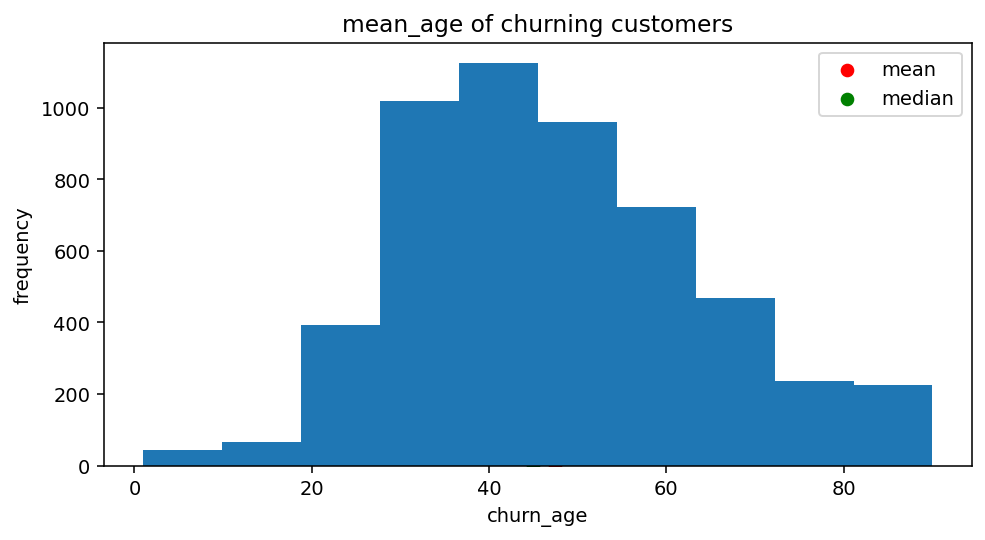

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## plot of churn age 

churn_age = data.loc[data.churn == 1, 'age']
plt.figure(figsize = (8, 4), dpi = 140)
plt.xlabel('churn_age')
plt.ylabel('frequency')
plt.title('mean_age of churning customers')
plt.scatter(churn_age.mean(), 0, label = 'mean', color = 'red')
plt.scatter(churn_age.median(), 0, label = 'median', color = 'green')
plt.hist(churn_age)
plt.legend()


<AxesSubplot:title={'center':'Age of the people who churned'}, xlabel='age', ylabel='Density'>

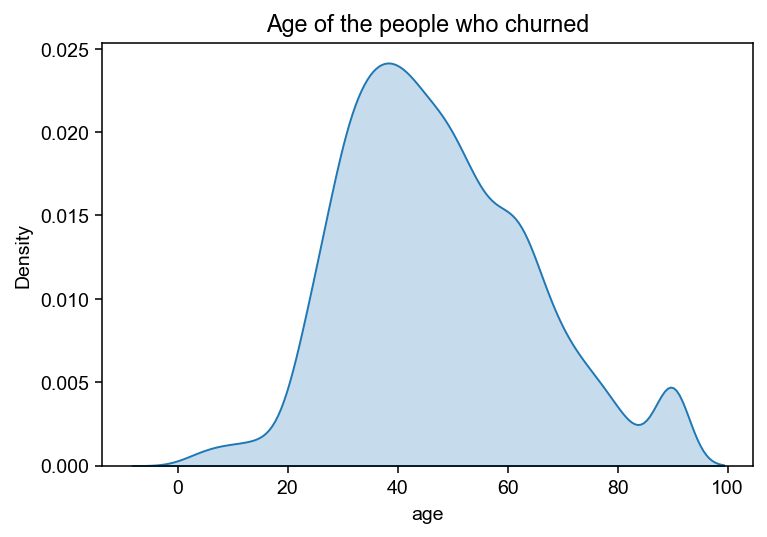

In [37]:
import seaborn as sns
plt.figure(dpi = 140)
plt.title('Age of the people who churned')
sns.set(style = 'darkgrid')
sns.kdeplot(churn_age, shade = True)

In [38]:
Mean = churn_age.mean()
Median = churn_age.median()
Standard_deviation = Mean - churn_age.std(), Mean + churn_age.std()

Mean, Median, Standard_deviation

(47.461216730038025, 45.0, (30.285242583286085, 64.63719087678996))

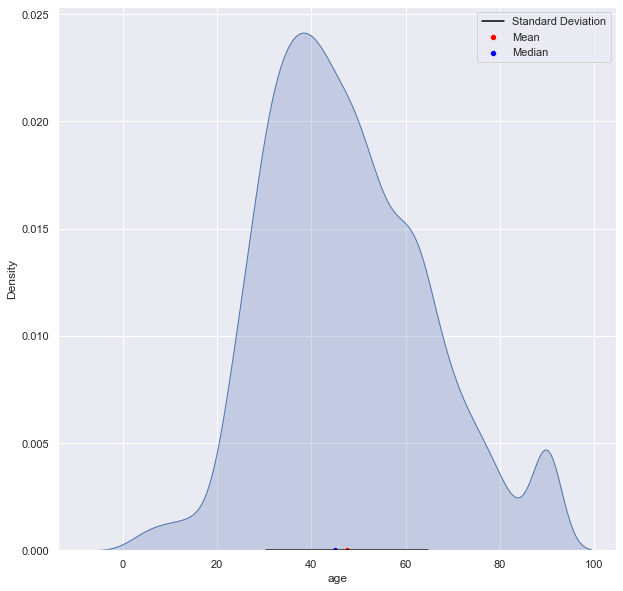

In [39]:
plt.figure(figsize = (10, 10))
sns.kdeplot(churn_age, shade = True)
sns.scatterplot(x = [Mean], y = [0], color = 'red', label = 'Mean')
sns.scatterplot(x = [Median], y = [0], color = 'blue', label = 'Median')
sns.lineplot(x = Standard_deviation, y = [0, 0], color = 'black', label = 'Standard Deviation')
plt.show()

In [40]:
import statsmodels.api as sm
import pylab as py

import warnings
warnings.filterwarnings('ignore')

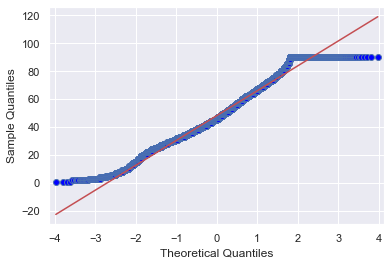

In [41]:
sm.qqplot(data.age, line ='s')
py.show()

In [42]:
data.age.skew()

0.33058929557517264

In [43]:
data.age.kurtosis()

-0.16866785691275865

In [44]:
## vintage of customers
v_mean = data.vintage.mean()
v_median = data.vintage.median()
v_mode = data.vintage.mode()

v_mean, v_median, v_mode

(2091.1441054189277,
 2154.0,
 0    2251
 1    2260
 dtype: int64)

In [45]:
data.vintage.value_counts()[2251], data.vintage.value_counts()[2260]

(69, 69)

In [46]:
data.vintage.std()

272.67677522772846

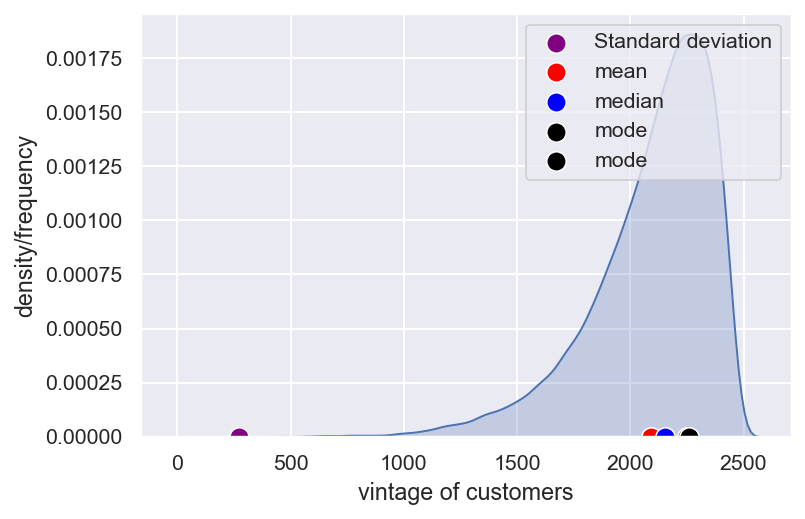

In [47]:
## plotting kde with descriptives
plt.figure(dpi = 140)
#plt.figure(figsize = (12, 12))
sns.kdeplot(data.vintage, shade = True)
sns.scatterplot([data.vintage.std()], [0], s = 100, color = 'purple', label = 'Standard deviation')
sns.scatterplot([v_mean], [0], s = 100, color = 'red', label = 'mean')
sns.scatterplot([v_median], [0], color = 'blue', s = 100, label = 'median')
sns.scatterplot(v_mode[0], [0], color = 'black', s = 100, label = 'mode')
sns.scatterplot(v_mode[1], [0], color = 'black', s = 100, label = 'mode')

plt.xlabel('vintage of customers')
plt.ylabel('density/frequency')
plt.show()

In [48]:
data.vintage.skew()

-1.3889357082821185

In [49]:
data.vintage.kurtosis()

2.7234245375227926

<Figure size 840x560 with 0 Axes>

<Figure size 720x720 with 0 Axes>

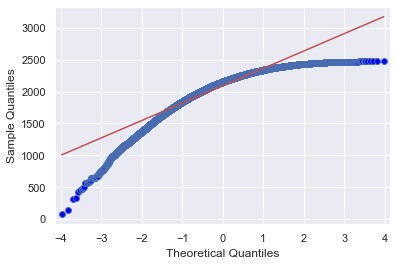

In [50]:
plt.figure(dpi = 140)
plt.figure(figsize = (10, 10))
sm.qqplot(data.vintage, line = 's')
py.show()
plt.show()

In [51]:
data.select_dtypes( include = ['int64', 'Int64', 'float64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_trans                      float64
moy_ls_trans                      float64
woy_ls_trans                      float64
dow_ls_trans                      float64
dtype: object

In [52]:
customer_details = ['customer_id', 'vintage', 'age']
current_month = ['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
previous_month = ['previous_month_end_balance', 'previous_month_credit',  'current_month_debit', 'previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_trans', 'moy_ls_trans', 'woy_ls_trans', 'dow_ls_trans']

In [53]:
def UVA_numeric(data, var_group):

    '''
        univariate numeric analysis
        plots and kde of variables
    '''
    size = len(var_group)
    plt.figure(figsize = (10, 10), dpi = 100)
    for i, j in enumerate(var_group):
        
        mea = data[j].mean()
        medi = data[j].median()
        ma = data[j].max()
        min = data[j].min()
        rang = data[j].max() - data[j].min()
        st_d = mea - data[j].std(), mea + data[j].std() 
        ske = data[j].skew()
        kurt = data[j].kurtosis()
        
        plt.subplot(1, size, i+1)
        sns.scatterplot([mea], [0], color = 'red', s = 50, label = 'mean')
        sns.lineplot(st_d, [0,0], color = 'black', label = 'Standard deviation')
        sns.scatterplot([medi], [0], s = 50, color = 'blue', label = 'median')
        sns.scatterplot([ma], [0], s = 50, color = 'violet', label = 'maximum value')
        sns.scatterplot([min], [0], s = 50, color = 'purple', label = 'minimum value')
        
        plt.xlabel('{}'.format(j))
        plt.ylabel('density')
        plt.title('mean {} \n median {} \n range {} - {} \n kurtosis {} \n skewness {} \n standard_deviation {},  {} \n'.format(mea, medi, ma,min, kurt, ske, st_d[0], st_d[1]))
        sns.kdeplot(data[j], shade = True)
    
        


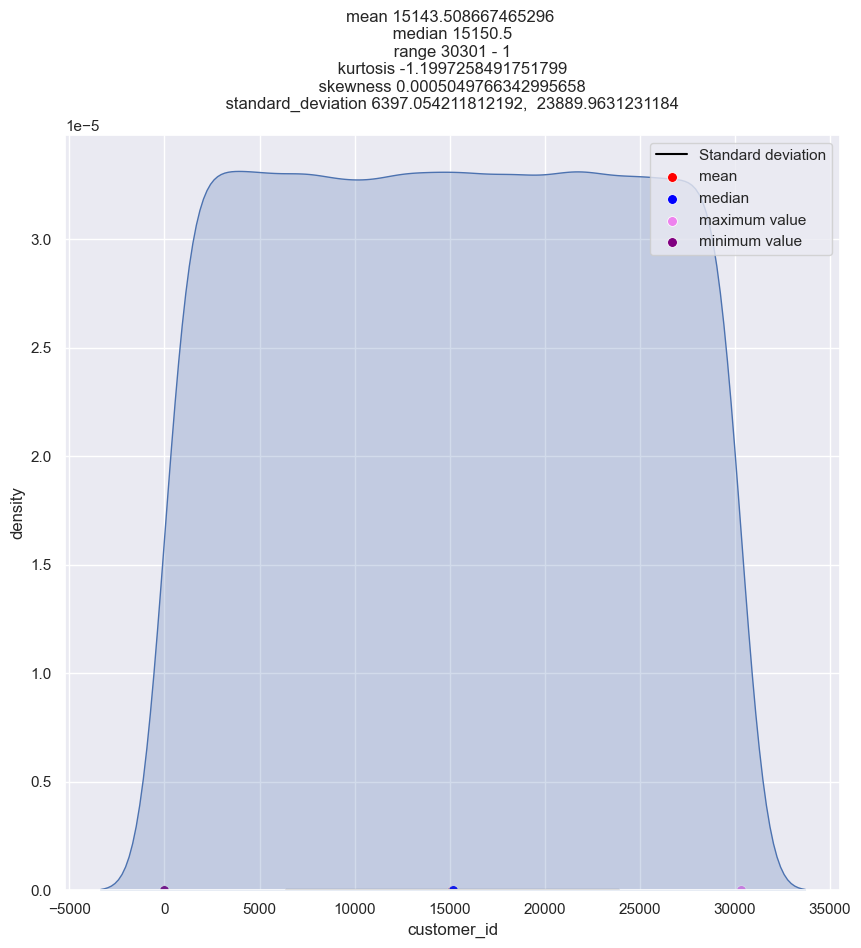

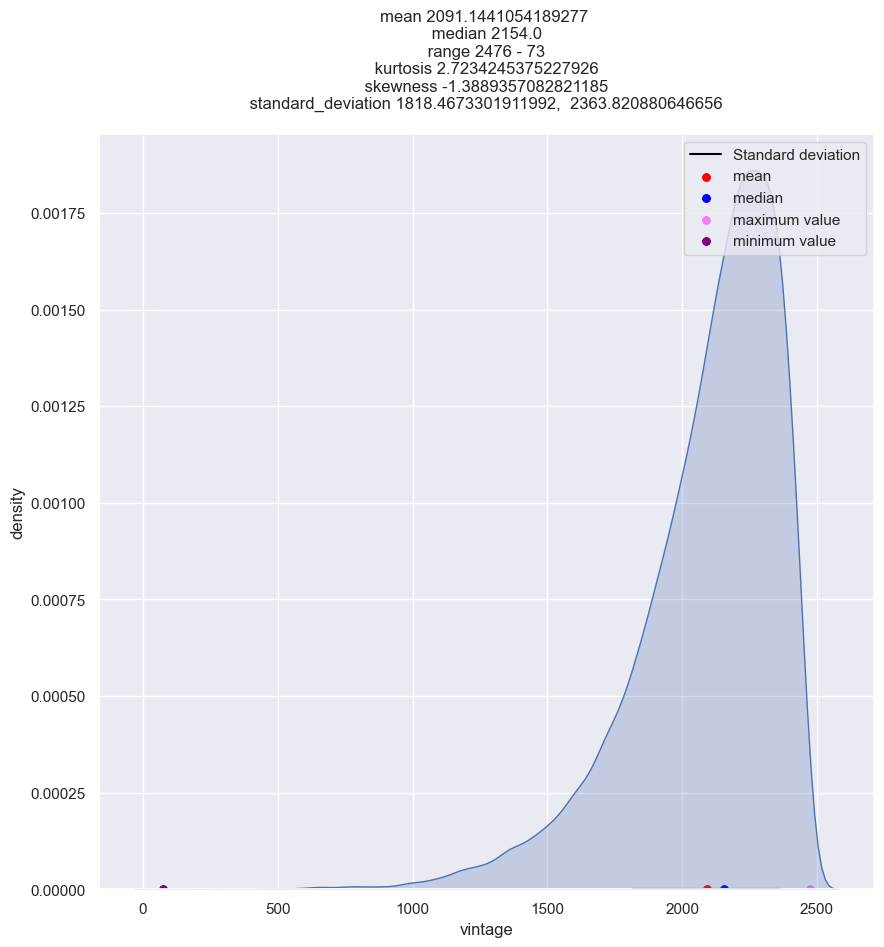

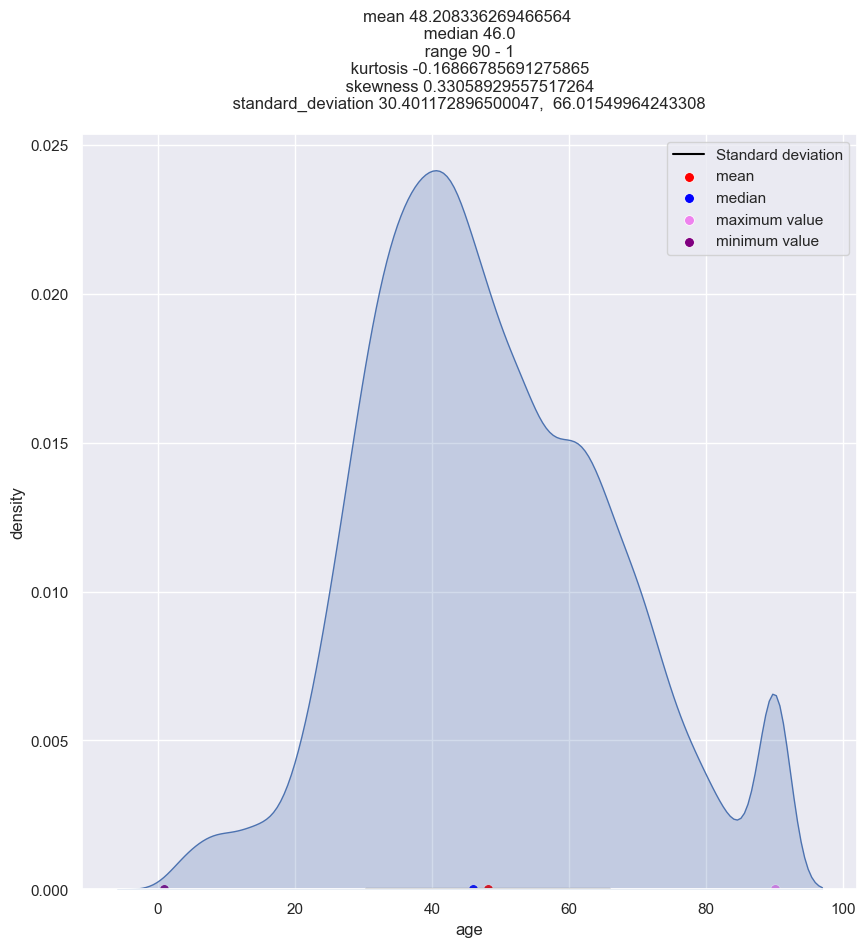

In [54]:
for i in customer_details:
    UVA_numeric(data, [i])

None
None
None
None


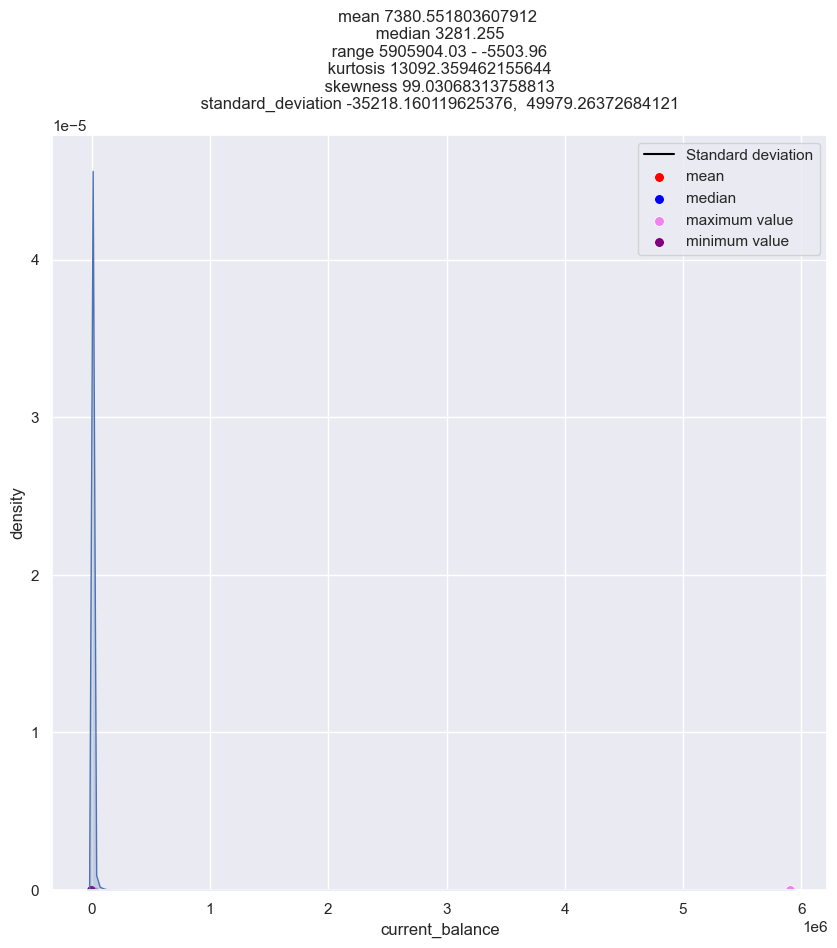

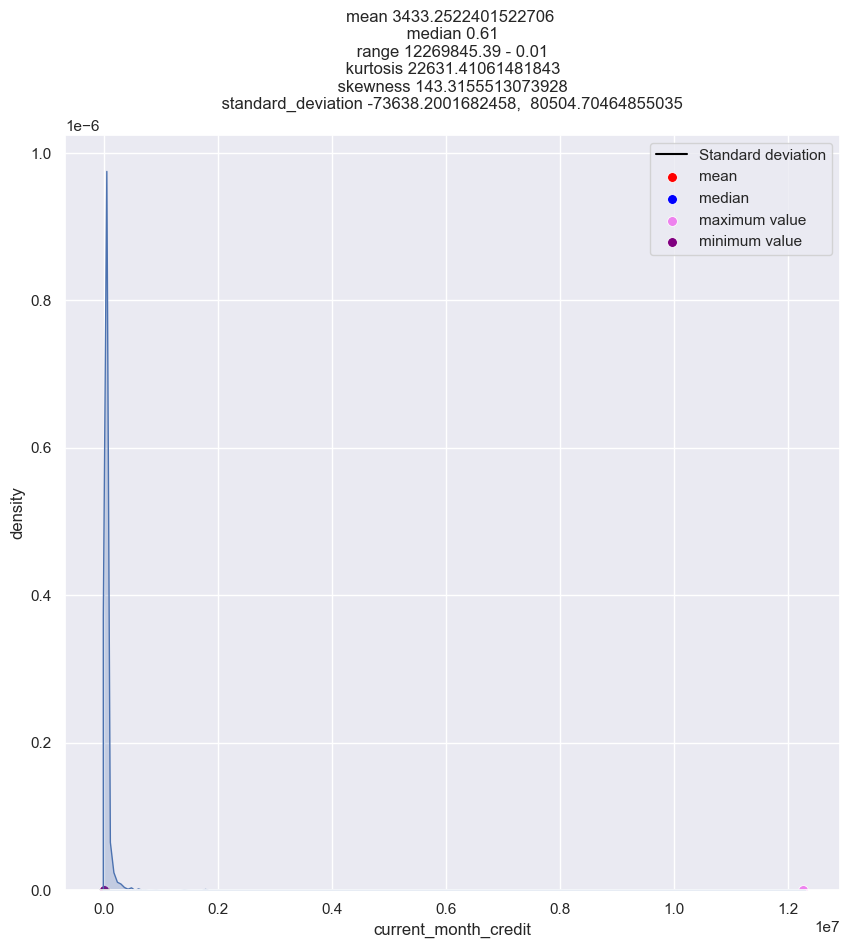

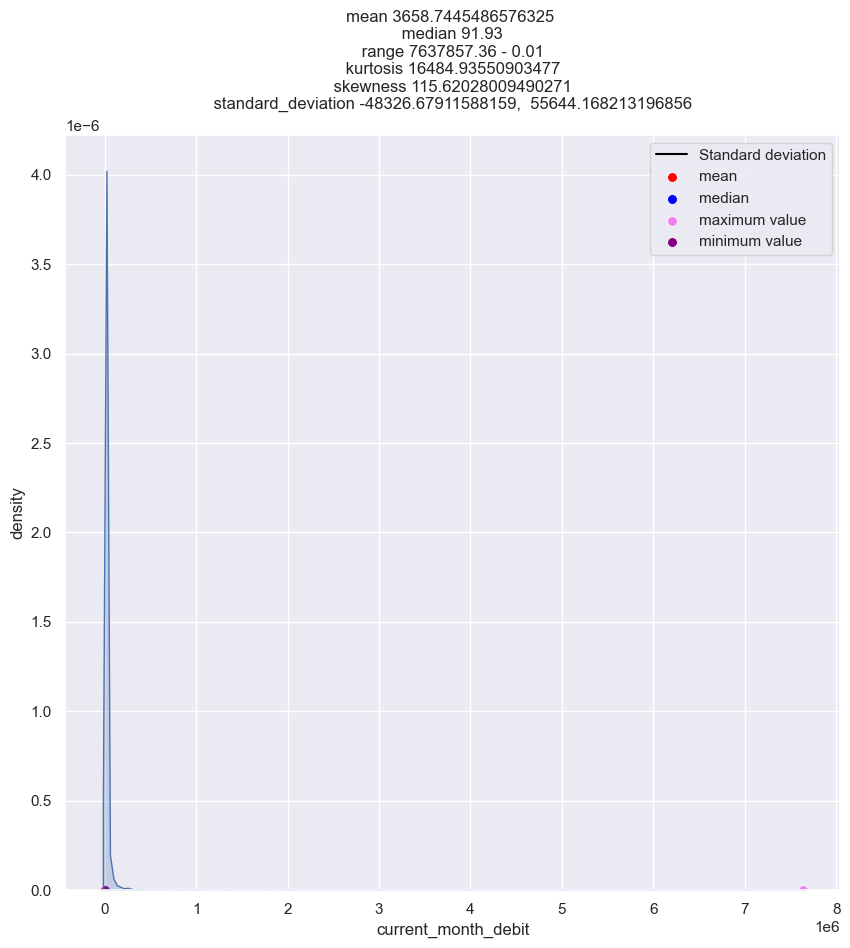

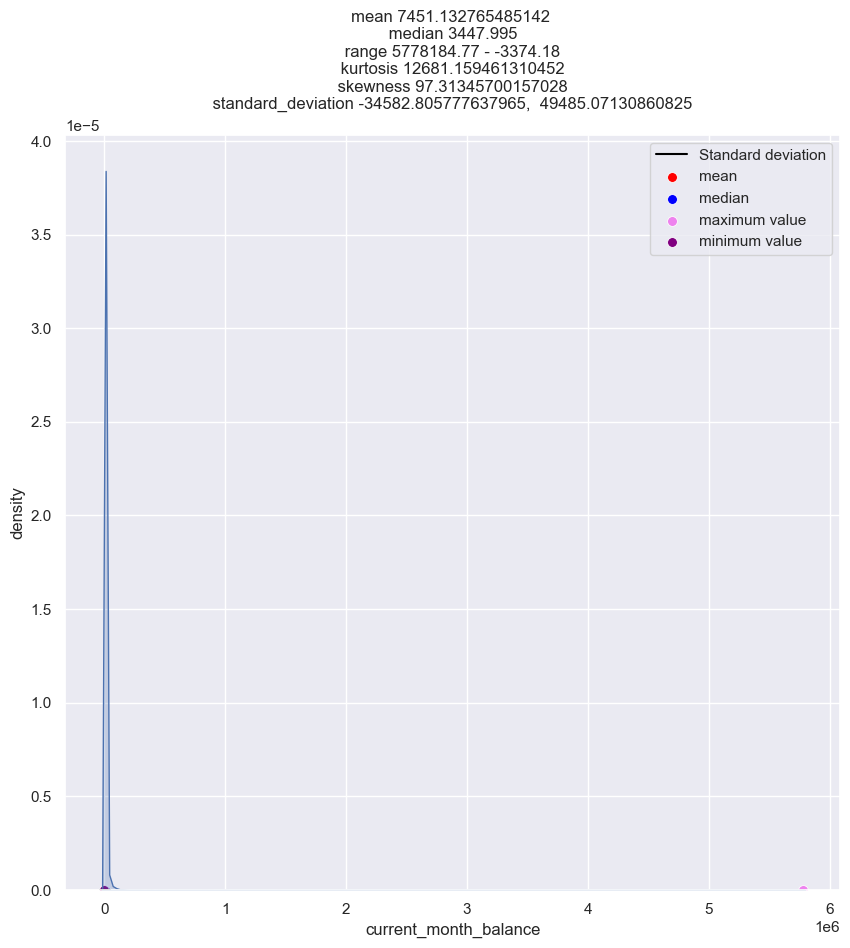

In [55]:
for i in current_month:
    print(UVA_numeric(data, [i]))

In [56]:
#['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
factor = 1

cm_data = data[current_month]

cm_data = cm_data.loc[(cm_data.current_balance < (cm_data.current_balance.mean() + factor*cm_data.current_balance.std()))& (cm_data.current_balance > (cm_data.current_balance.mean() - factor*cm_data.current_balance.std())) ]
cm_data = cm_data.loc[(cm_data.current_month_credit < (cm_data.current_month_credit.mean() + factor*cm_data.current_month_credit.std())) & (cm_data.current_month_credit > (cm_data.current_month_credit.mean() - factor*cm_data.current_month_credit.std()))]
cm_data = cm_data.loc[(cm_data.current_month_debit < (cm_data.current_month_debit.mean() + factor*cm_data.current_month_debit.std())) & (cm_data.current_balance > (cm_data.current_month_debit.mean() - factor*cm_data.current_month_debit.std()))]
cm_data = cm_data.loc[(cm_data.current_month_balance < (cm_data.current_month_balance.mean() + factor*cm_data.current_month_balance.std())) & (cm_data.current_month_balance > (cm_data.current_month_balance.mean() - factor*cm_data.current_month_balance.std()))]
len(data), len(cm_data)

(28382, 23967)

None
None
None
None


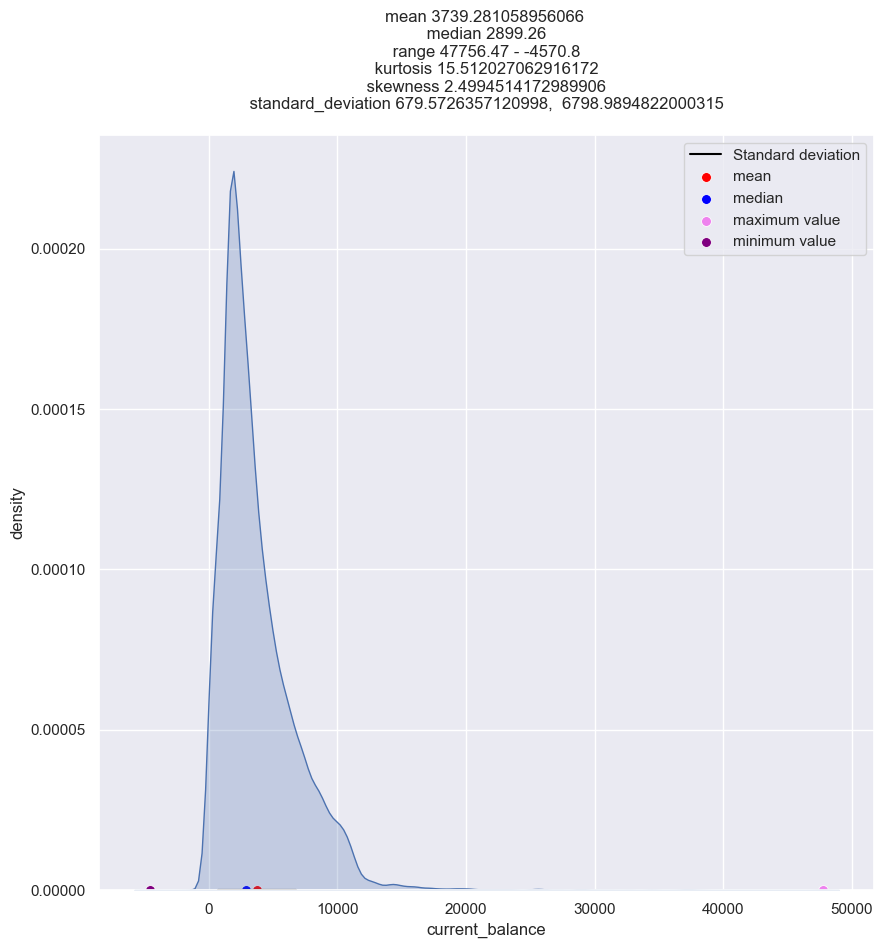

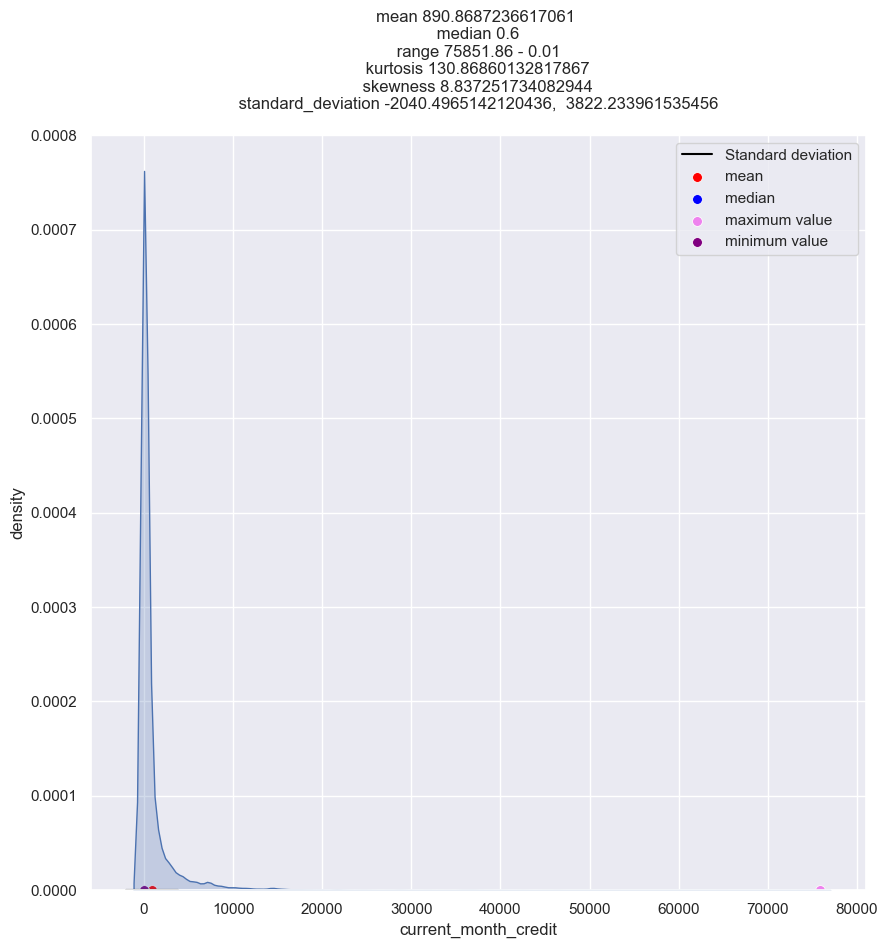

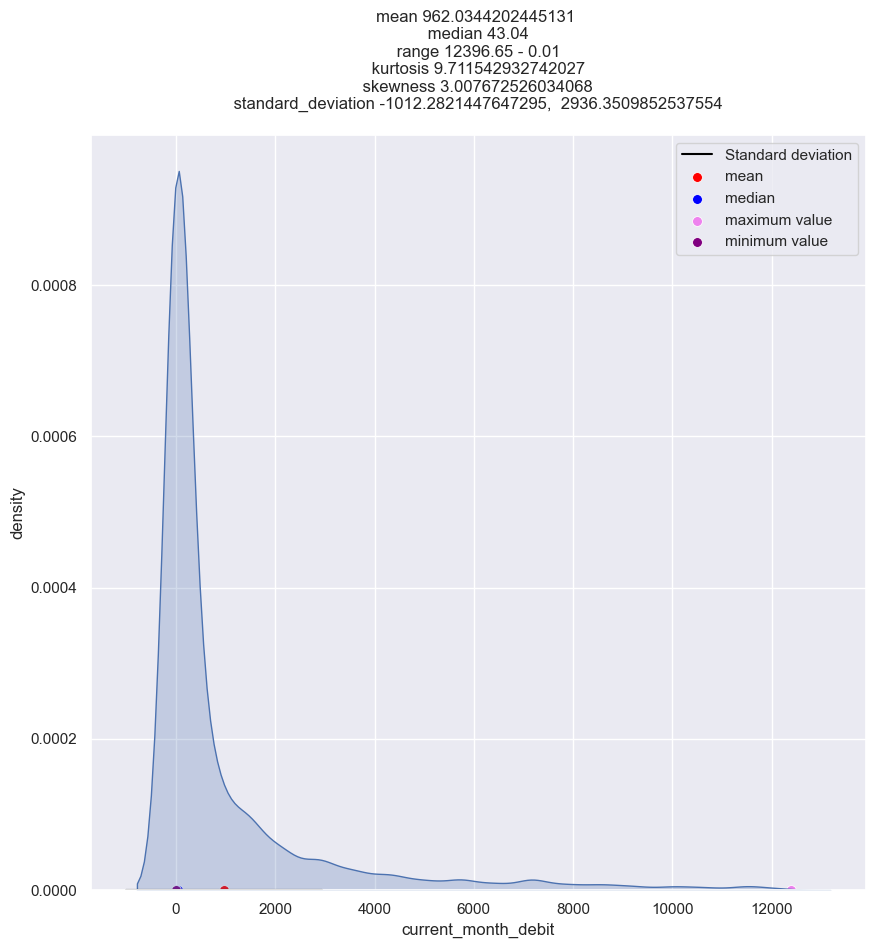

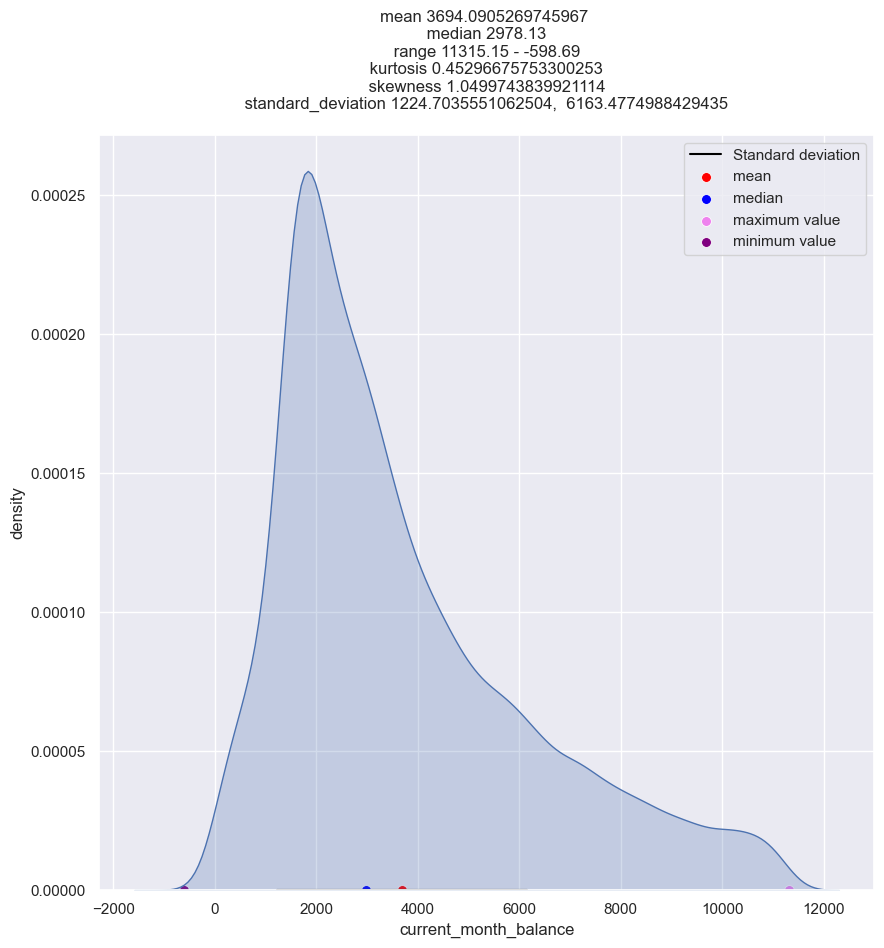

In [57]:
for i in cm_data:
    print(UVA_numeric(cm_data, [i]))

None
None
None
None


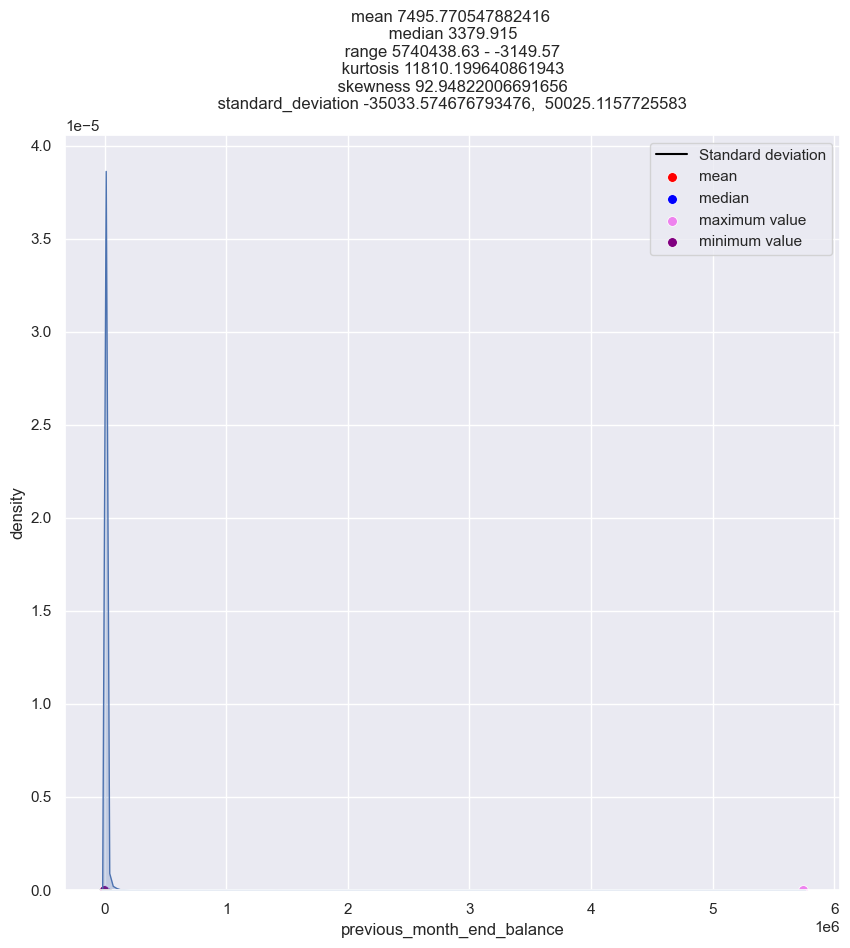

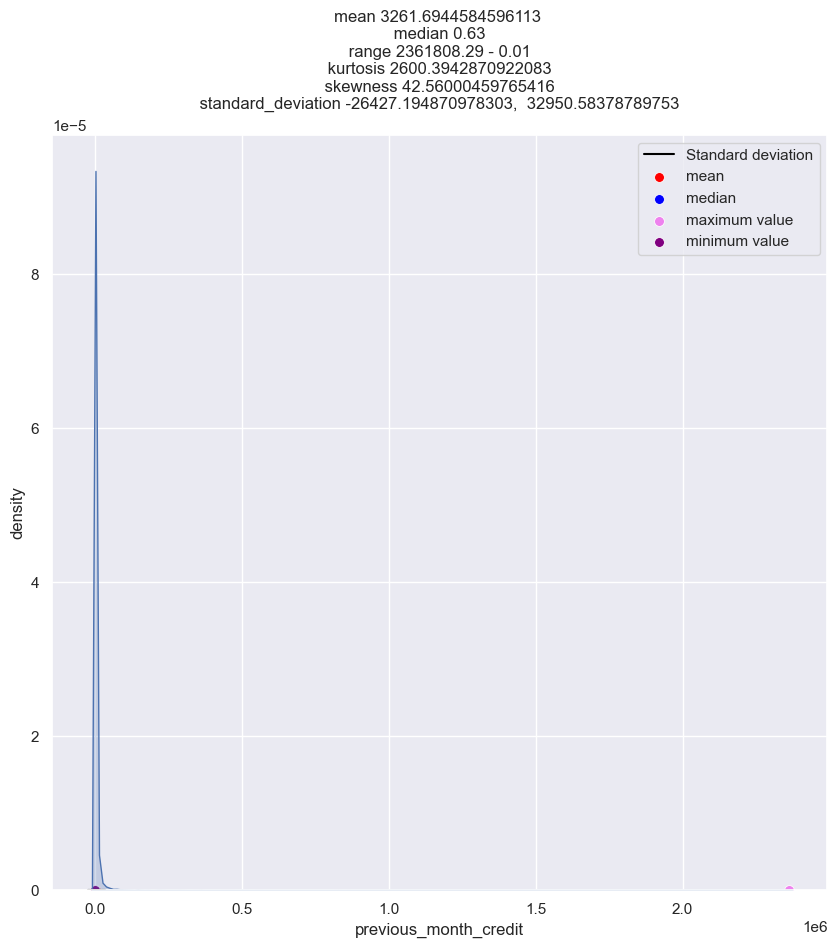

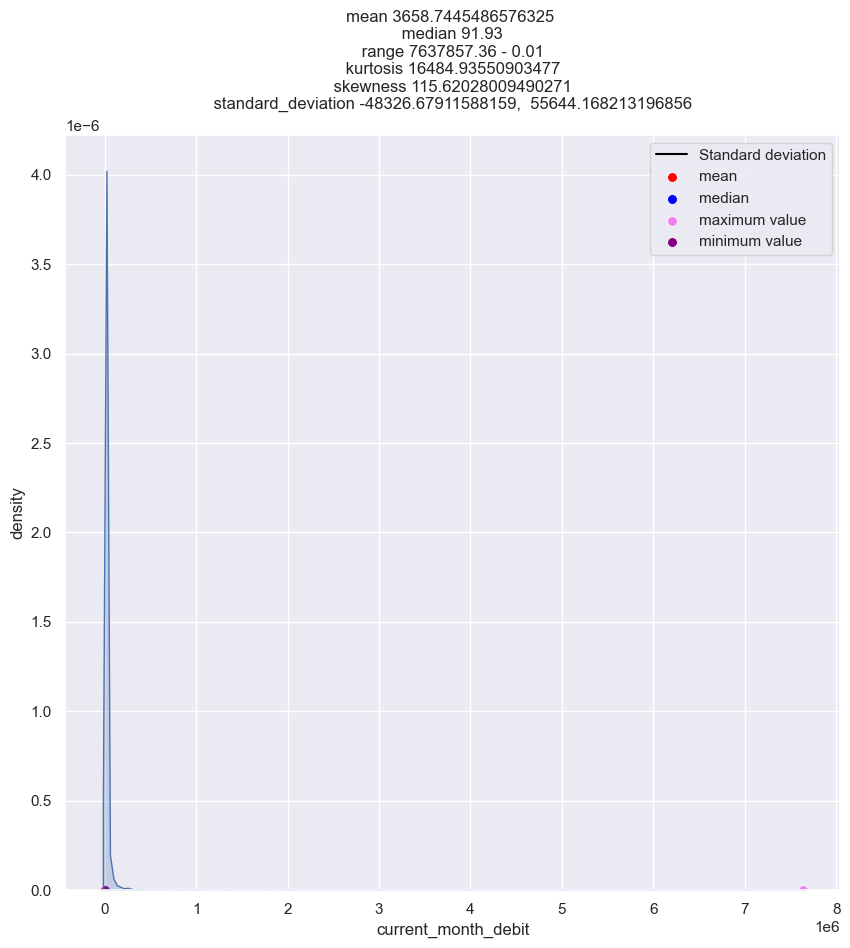

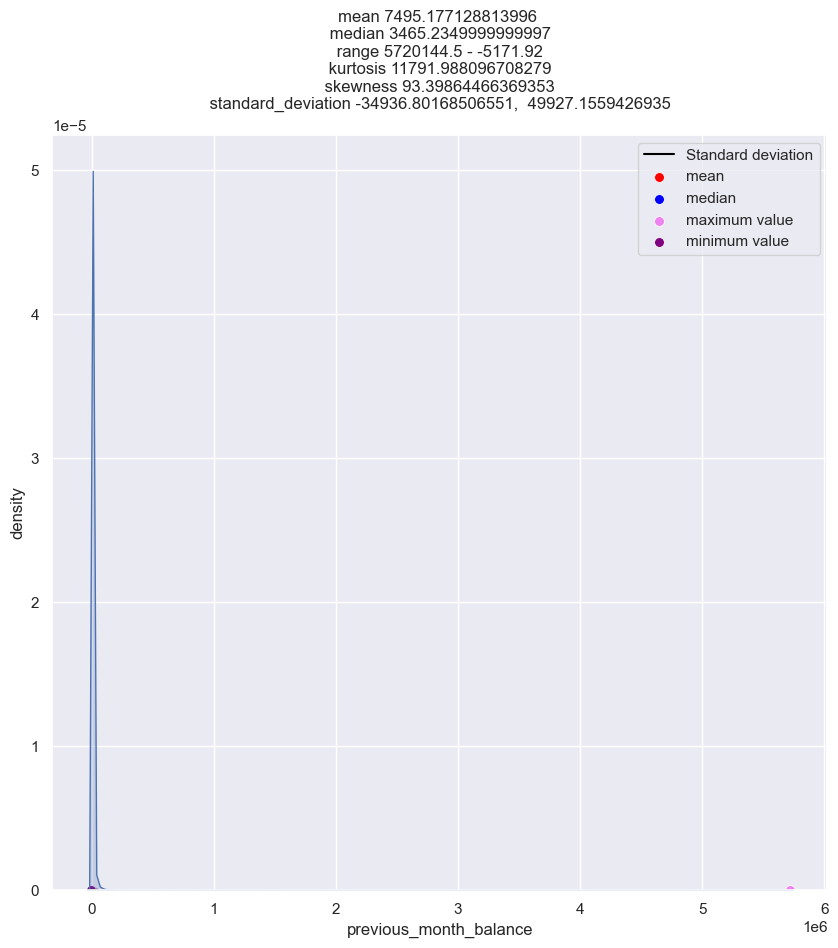

In [58]:
for i in previous_month:
    print(UVA_numeric(data, [i]))

None
None


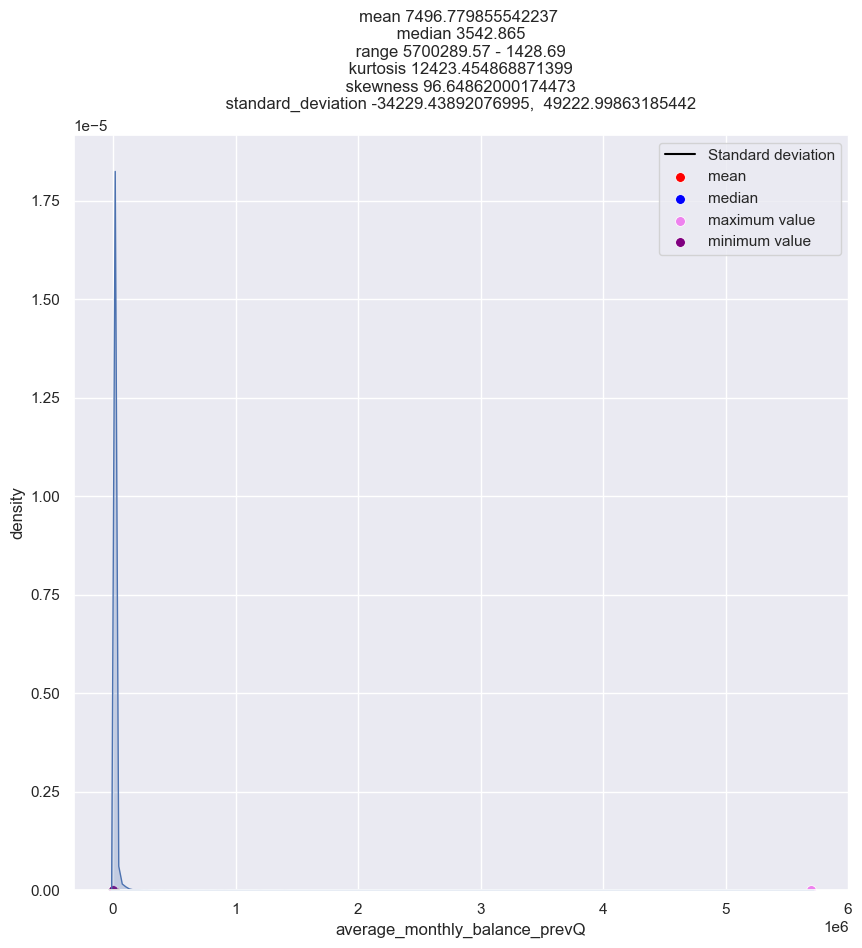

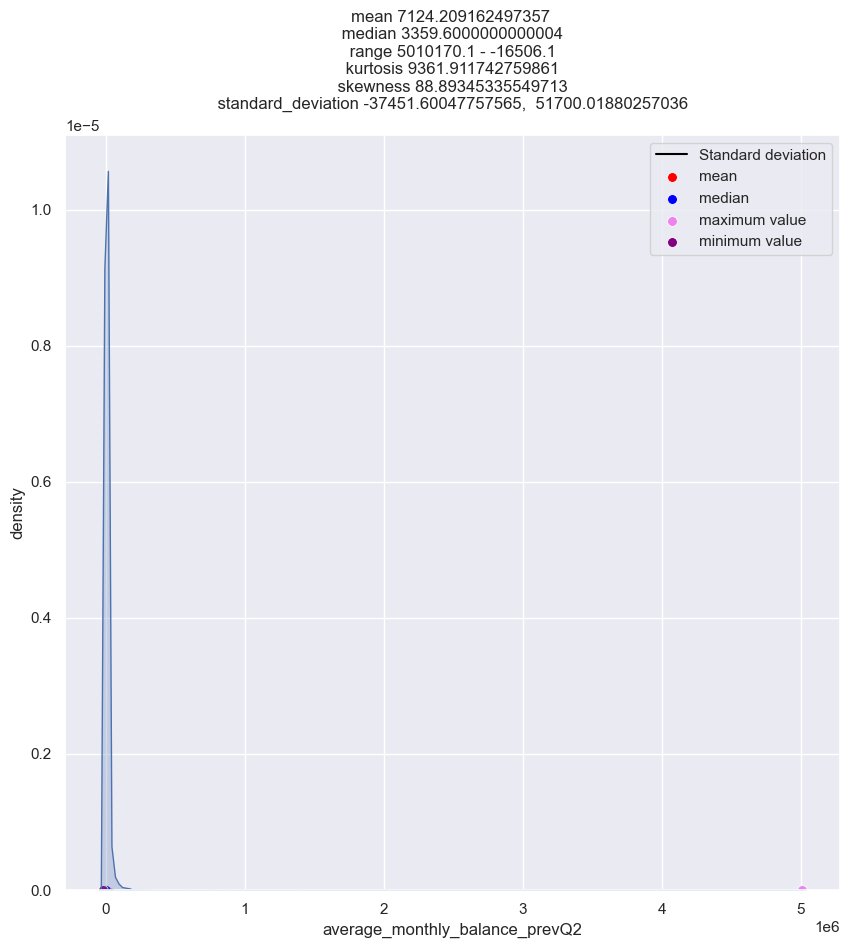

In [59]:
for i in previous_quarters:
    print(UVA_numeric(data, [i]))

None
None
None
None


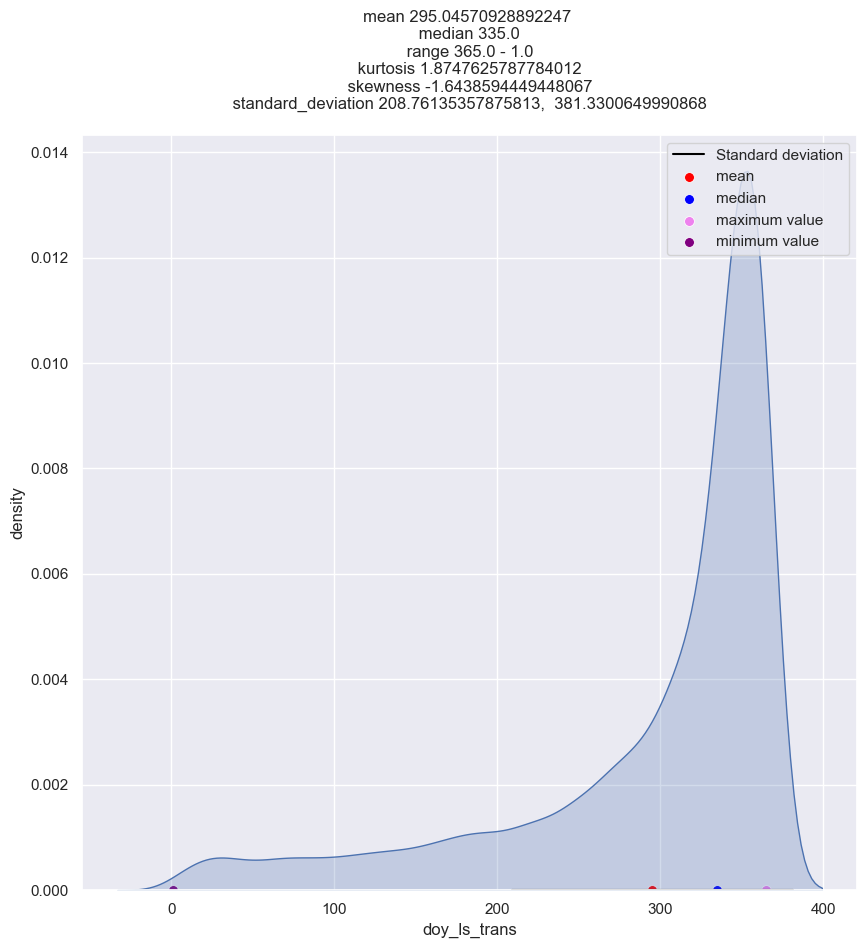

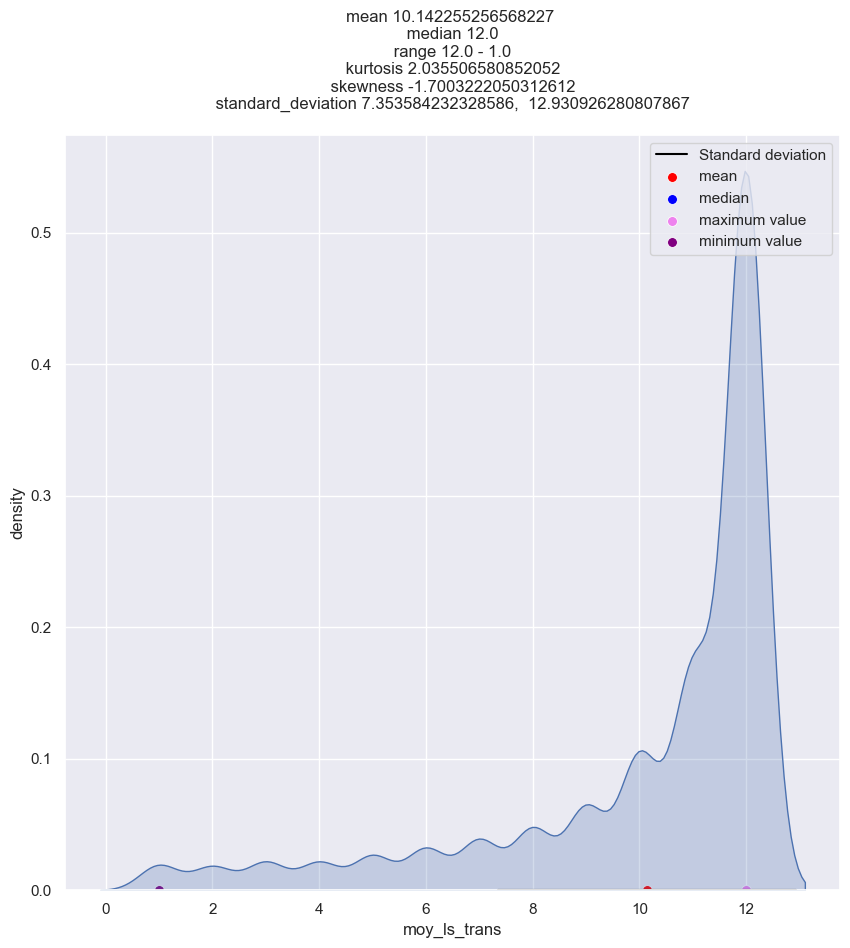

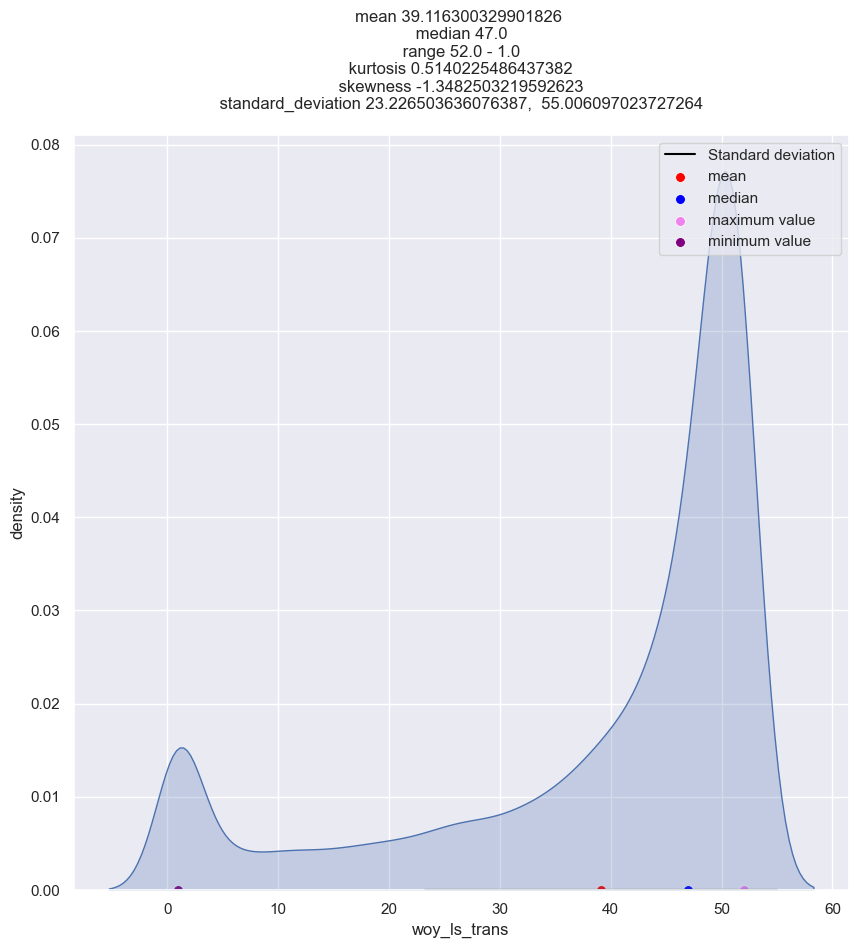

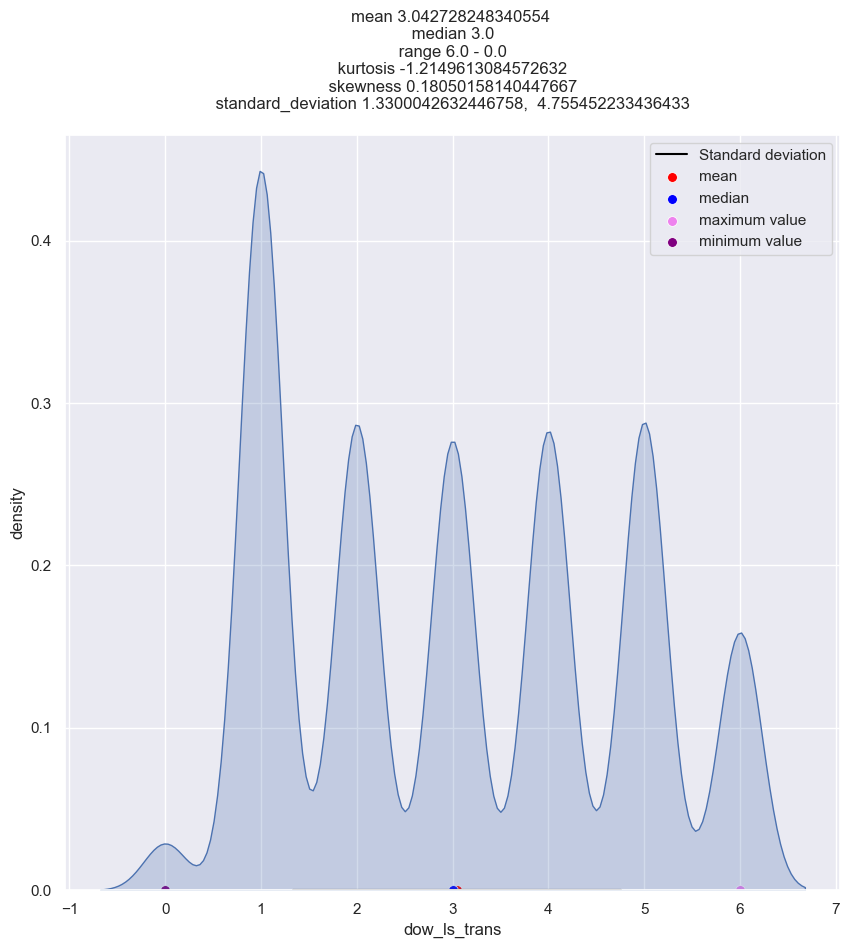

In [60]:
for i in transaction_date:
    print(UVA_numeric(data, [i]))

In [61]:
data.gender.value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [62]:
## probability of getting a male of female customer
data.gender.value_counts()/( sum(data.gender.value_counts().values) )

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [63]:
## another way of getting probabilities
data.gender.value_counts( normalize = True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [64]:
## number of categories in occupation
data.occupation.nunique()

5

In [65]:
data.occupation.mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

In [66]:
data.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [67]:
data.occupation.value_counts(normalize = True)

self_employed    0.617483
salaried         0.236874
student          0.072716
retired          0.071514
company          0.001413
Name: occupation, dtype: float64

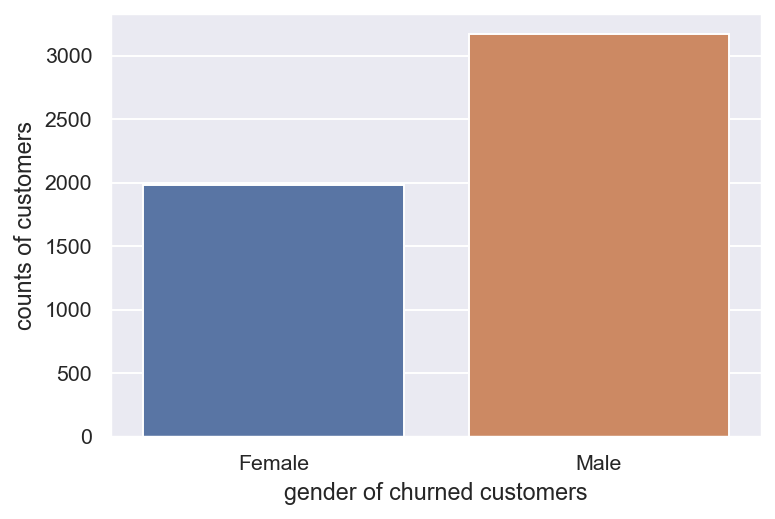

In [68]:
## bernoulli distribution

plt.figure(dpi = 140)
sns.barplot(x = data.loc[data.churn == 1, 'gender'].value_counts().index, y =  data.loc[data.churn == 1, 'gender'].value_counts().values)
plt.xlabel('gender of churned customers')
plt.ylabel('counts of customers')
plt.show()

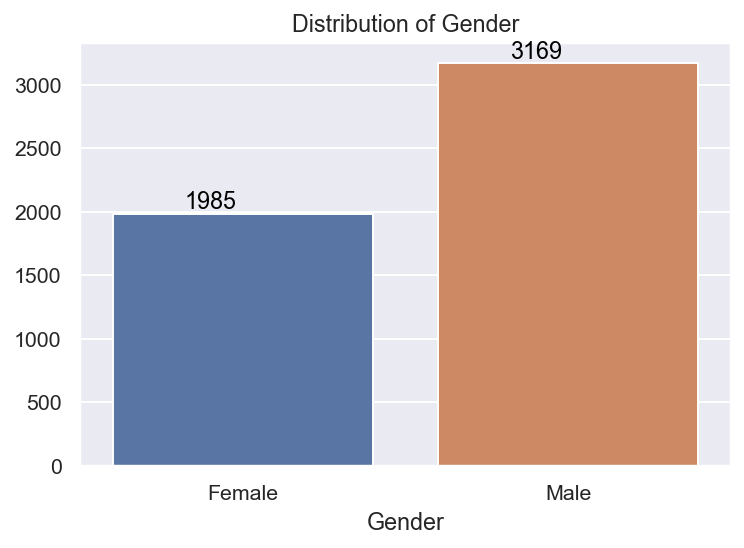

In [69]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y=data[data['churn']==1]['gender'].value_counts().values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

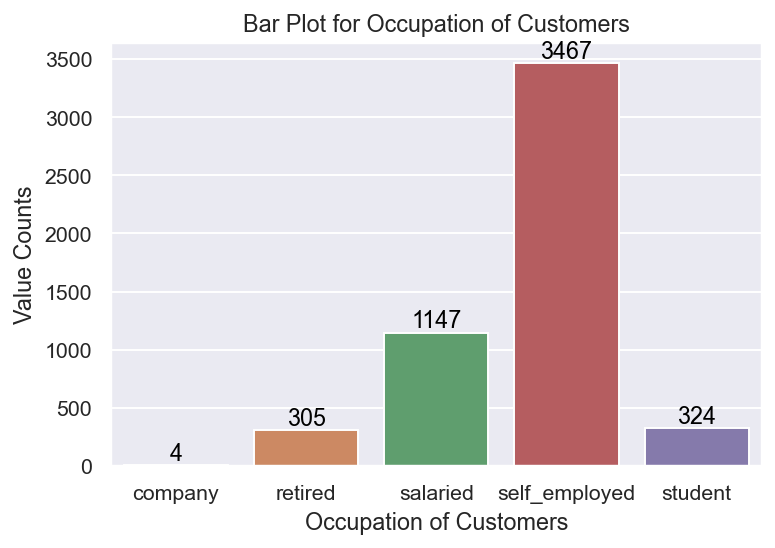

In [70]:
plt.figure(dpi = 140)
ax = sns.barplot(x = data.loc[data.churn == 1, 'occupation'].value_counts().index, y = data.loc[data.churn == 1, 'occupation'].value_counts().values)
plt.xlabel("Occupation of Customers")
plt.ylabel('Value Counts')
plt.title("Bar Plot for Occupation of Customers")

for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black' )

plt.show()

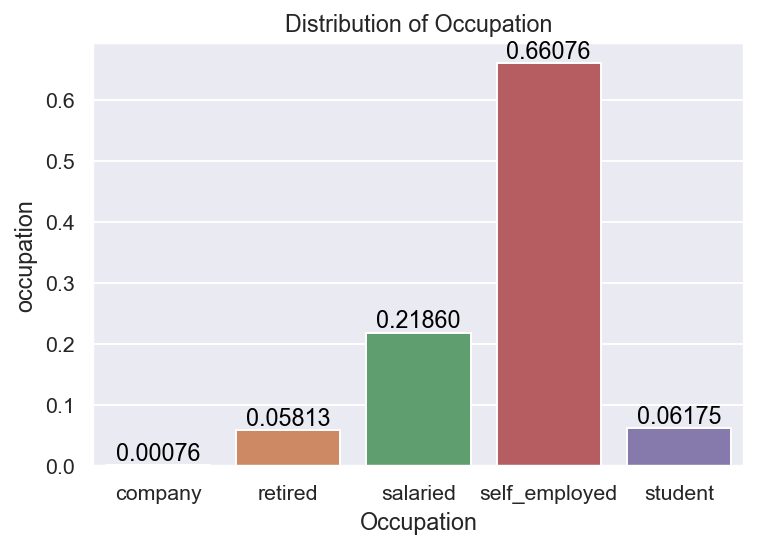

In [71]:
## probability of each category

plt.figure(dpi = 140)

ax = sns.barplot(x = data.loc[data.churn == 1, 'occupation'].value_counts().index, y = data.loc[data.churn == 1, 'occupation'].value_counts(normalize = True))
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
for p in ax.patches:
    ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color= 'black' )

plt.show()


In [72]:
cat_list = data[['gender', 'occupation', 'customer_nw_category']]

In [73]:
def UVA_category(data, var_group):
    size = len(var_group)
    plt.figure(figsize = (5, 5), dpi = 100)
    
    for i, j in enumerate(var_group):
        num_count = data[j].value_counts(normalize = True)
        n_uniques = data[j].nunique()
        
        plt.title('number_uniques {} value counts {}'.format(n_uniques, num_count))
        plt.xlabel('{}'.format(j))
        plt.ylabel('fraction/percentage')
        sns.barplot(x = num_count.index, y = num_count.values, order = num_count.index)
        plt.show()

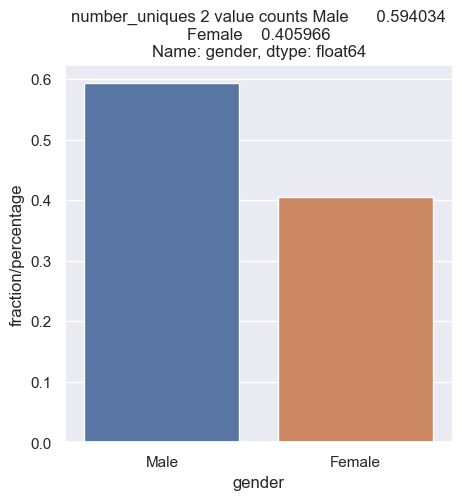

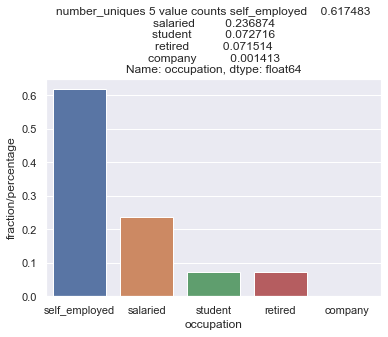

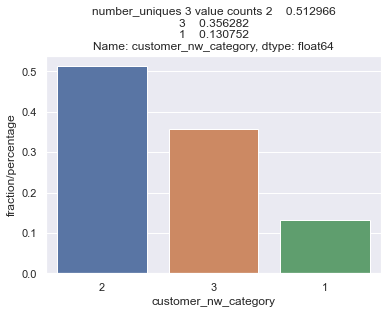

In [74]:
UVA_category(data, cat_list)

In [75]:
## which occupation accounts are responsible for outliers
## do customers belonging to the highest net worth category have high valued transactions 

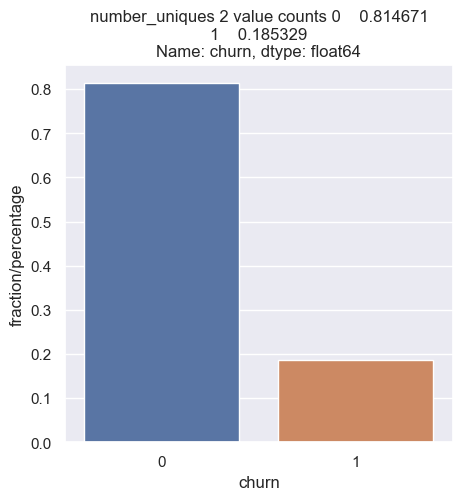

In [76]:
UVA_category(data, ['churn'])

In [77]:
## categorial variable analysis
def UVA_Category(data, cat_cols):
    
    size = len(cat_cols)
    plt.figure(figsize = (7*size, 5), dpi = 100)
    for i, j in enumerate(cat_cols):
        norm_count = data[j].value_counts(normalize = True)
        n_uni = data[j].nunique()
        
        plt.subplot(1, size, i+1)
        sns.barplot(norm_count.index, norm_count, order = norm_count.index)
        plt.xlabel('{}'.format(j))
        plt.ylabel('fraction/percentage')
        plt.title('number of unique values {}, value counts {}'.format(n_uni, norm_count))
        
        

In [78]:
data.select_dtypes(include = ['category']).dtypes

gender                  category
dependents              category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [79]:
customer_info = ['gender', 'occupation', 'customer_nw_category']

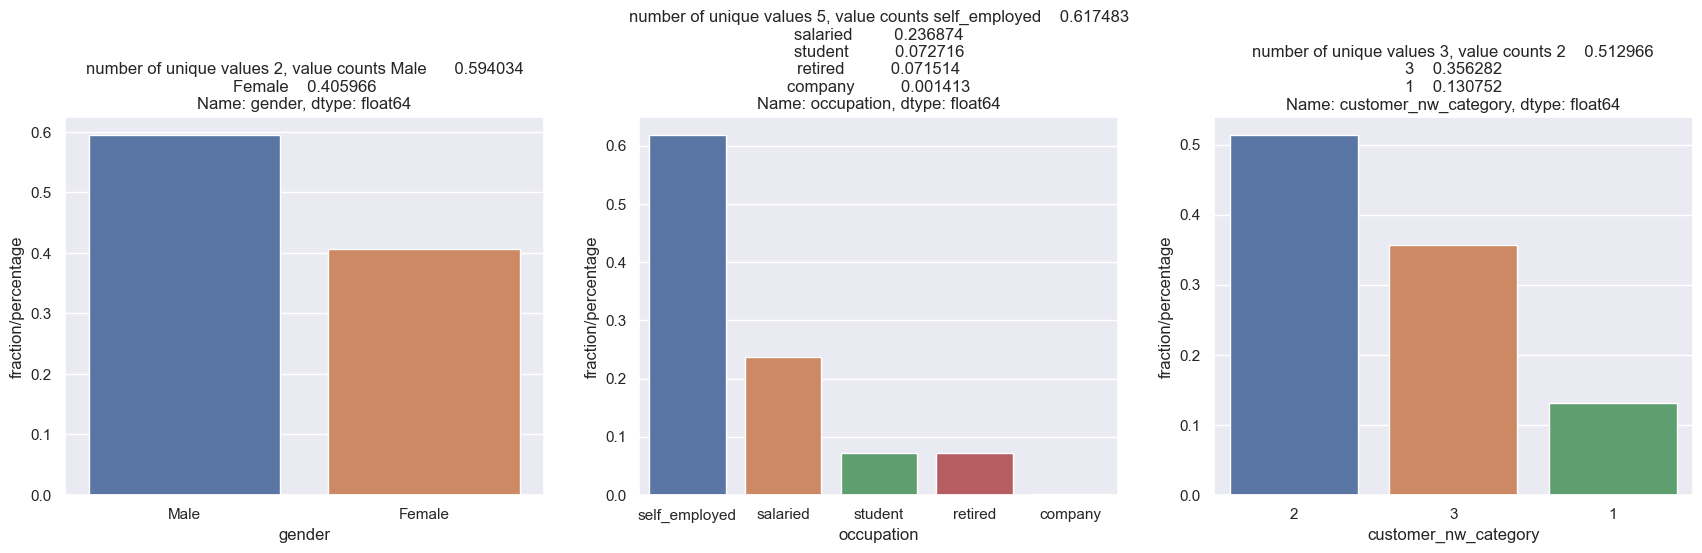

In [80]:
UVA_Category(data, customer_info)

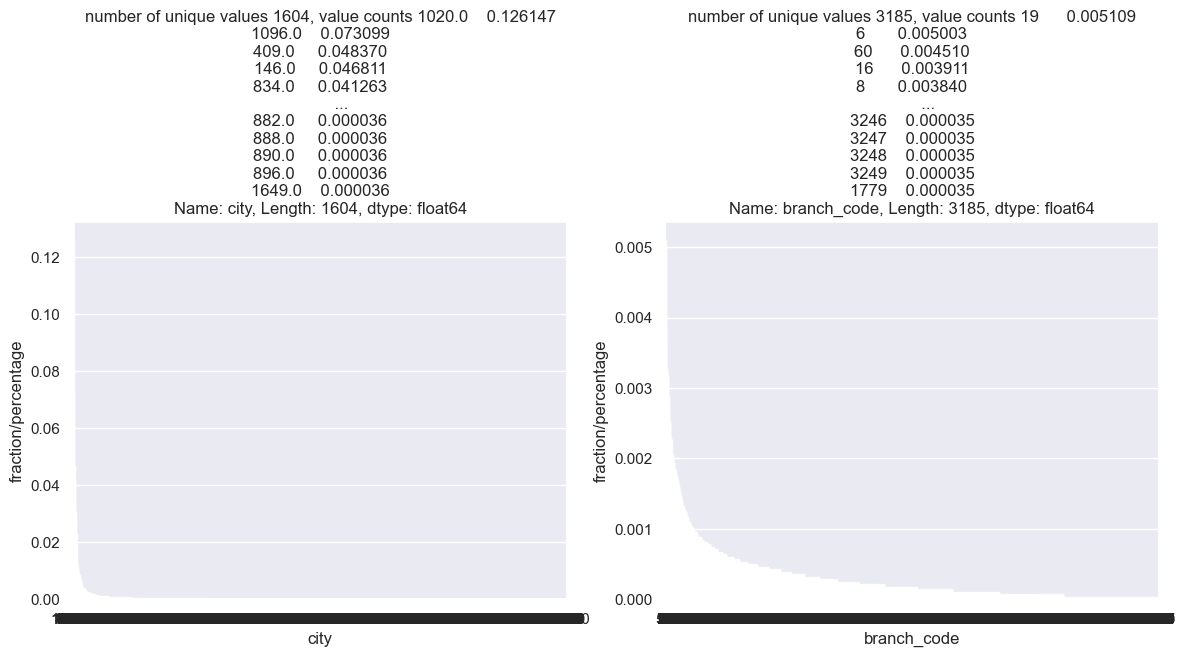

In [81]:
UVA_Category(data, ['city', 'branch_code'])

In [82]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
doy_ls_trans                      3223
moy_ls_trans                      3223
woy_ls_trans                      3223
dow_ls_trans                      3223
dtype: int64

In [83]:
def UVA_Outlier(data, numeric_data, include_outlier = True):
    
    size = len(numeric_data)
    plt.figure(figsize = (7*size, 5), dpi = 100)
    
    for i, j in enumerate(numeric_data):
        
        quant25 = data[j].quantile(0.25)
        quant75 = data[j].quantile(0.75)
        
        IQR = quant75 - quant25
        med = data[j].median()
        whis_low = med - 1.5*IQR
        whis_high = med + 1.5*IQR
        
        outlier_high = len(data.loc[data[j] > whis_high, j])
        outlier_low = len(data.loc[data[j] > whis_low, j])
        
        if include_outlier == True:
            print(include_outlier)
            plt.subplot(1, size, i+1)
            sns.boxplot(y = data[j], orient = "v")
            plt.ylabel('{}'.format(j))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
            
        else:
            data[j][data[j]> whis_high] = whis_high + 1
            data[j][data[j] < whis_low] = whis_low - 1
            
            plt.subplot(1, size, i+1)
            sns.boxplot( y = data[j], orient = "v")
            plt.ylabel('{}'.format(j))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


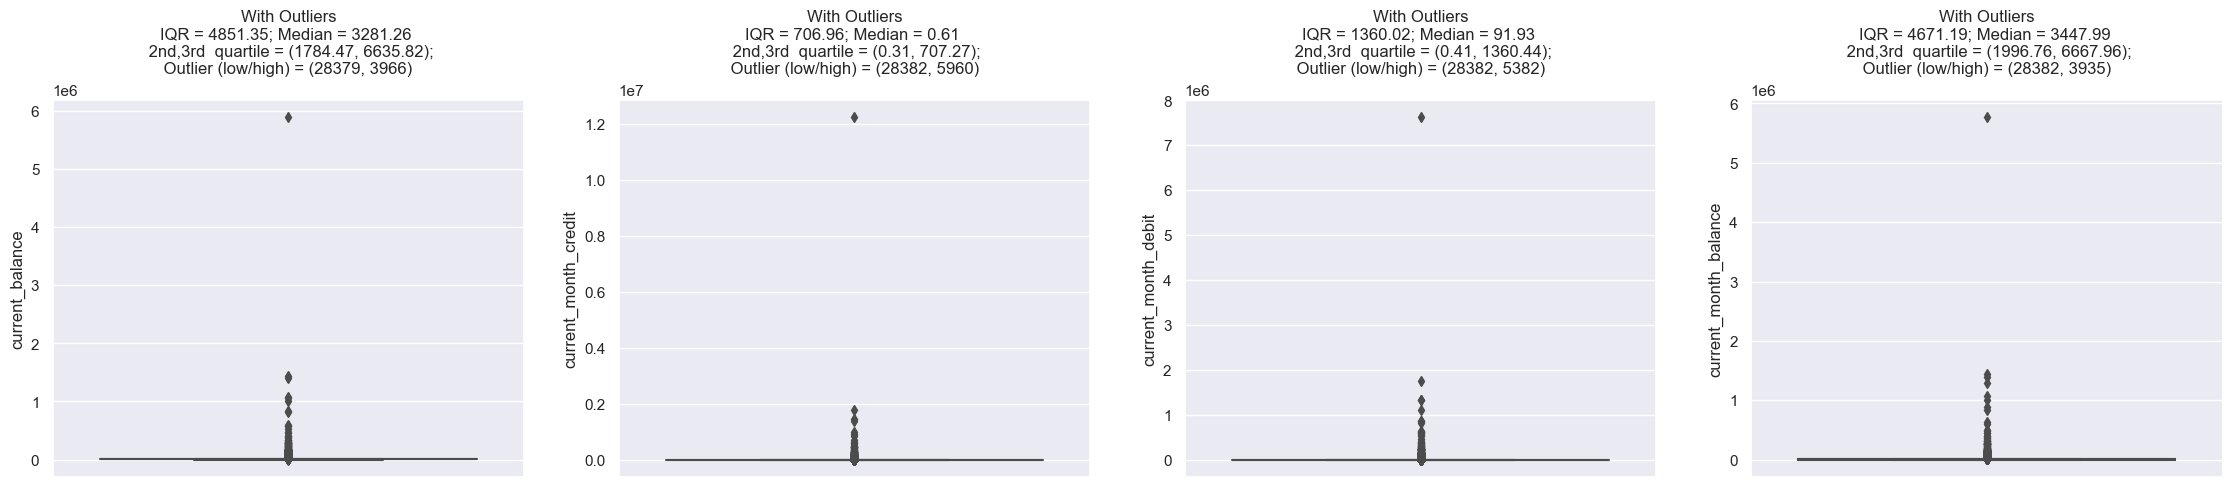

In [84]:
UVA_Outlier(data, current_month, )

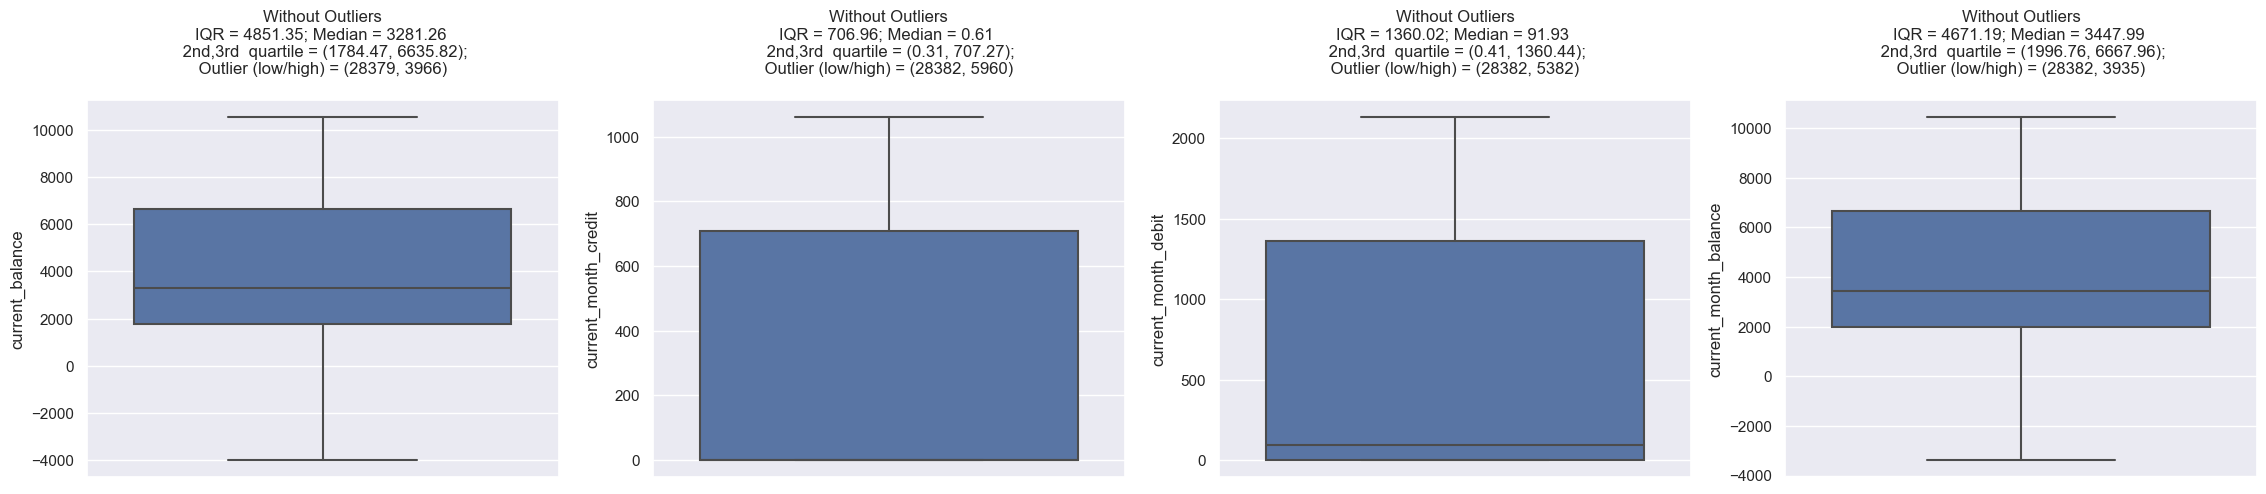

In [85]:
UVA_Outlier(data, current_month, False)

True
True
True
True


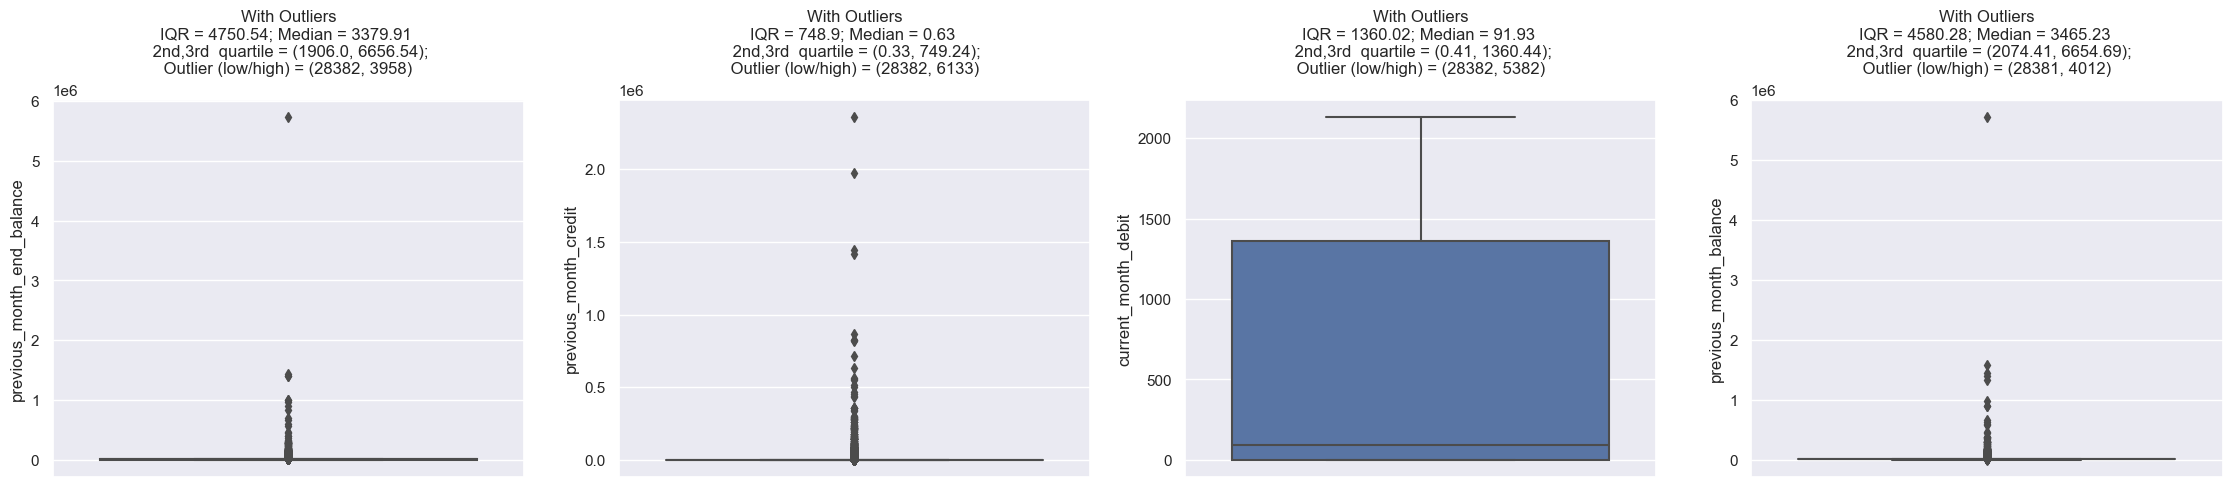

In [86]:
UVA_Outlier(data, previous_month)

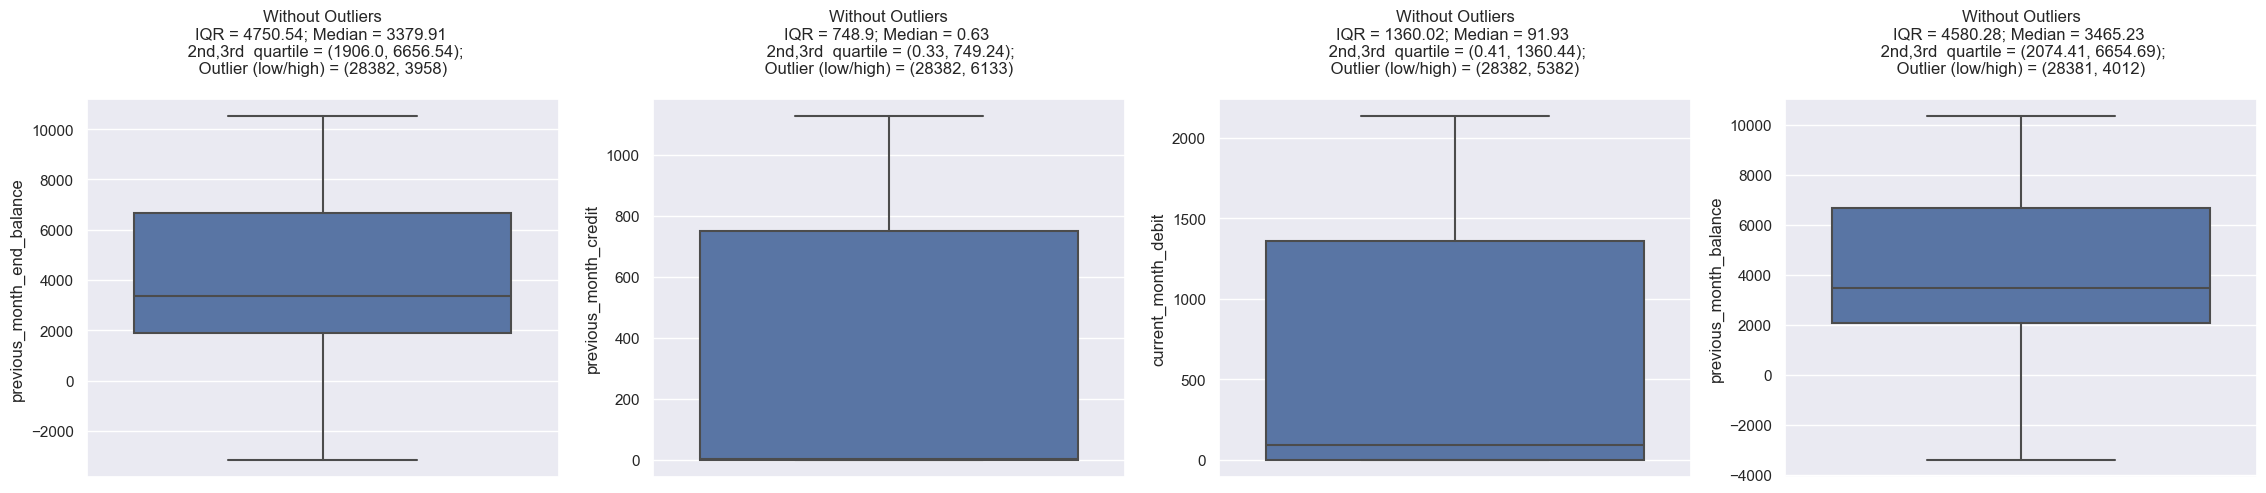

In [87]:
UVA_Outlier(data, previous_month, False)

True
True


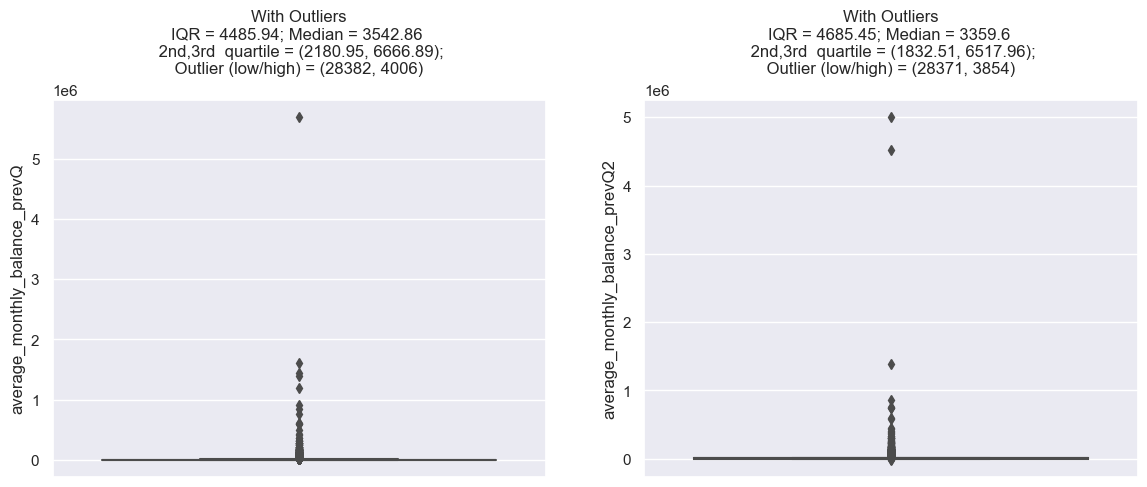

In [88]:
UVA_Outlier(data, previous_quarters)

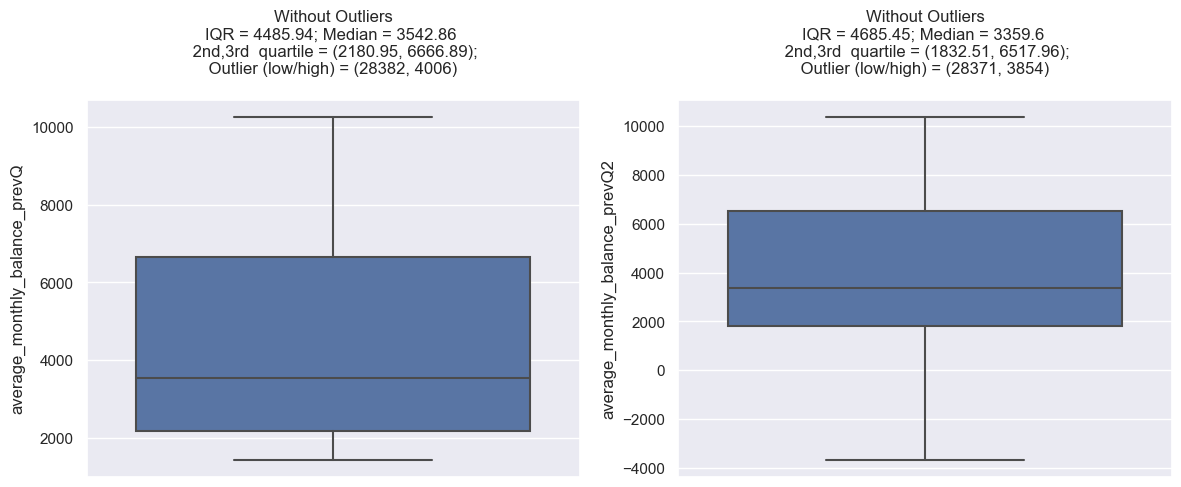

In [89]:
UVA_Outlier(data, previous_quarters, False)

In [90]:
population = data['vintage']

In [91]:
population = pd.DataFrame(population)

array([[<AxesSubplot:title={'center':'vintage'}>]], dtype=object)

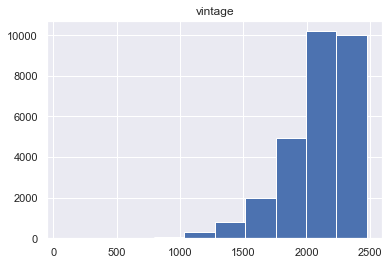

In [92]:
population.hist(bins = 10)

In [93]:
population.mean()

vintage    2091.144105
dtype: float64

In [94]:
sample_means = []
for i in range(0,1000):
    sample_means.append(population.sample(n = 100).mean().values[0])
    

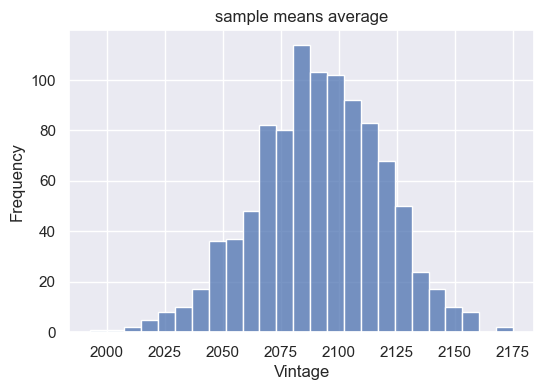

In [95]:
plt.figure(dpi = 100)
sns.histplot(sample_means)
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('sample means average')
plt.show()

<AxesSubplot:ylabel='Density'>

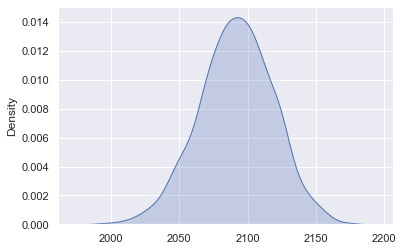

In [96]:
sns.kdeplot(sample_means, shade = True)

In [97]:
error = population.mean() - pd.Series(sample_means).mean()
error

vintage   -0.304575
dtype: float64

In [98]:
numerical_data = data.select_dtypes(include = ['int64', 'float64', 'Int64'])

In [99]:
numerical_data.corr()

customer_id   vintage       age  \
customer_id                        1.000000 -0.007750 -0.000442   
vintage                           -0.007750  1.000000  0.006220   
age                               -0.000442  0.006220  1.000000   
current_balance                    0.004757  0.006327  0.088139   
previous_month_end_balance        -0.000738  0.008726  0.088817   
average_monthly_balance_prevQ      0.002617  0.008783  0.109309   
average_monthly_balance_prevQ2     0.001755  0.006889  0.106595   
current_month_credit              -0.003094  0.005431  0.016713   
previous_month_credit             -0.009781 -0.004545  0.020694   
current_month_debit               -0.007049  0.001868  0.003227   
previous_month_debit              -0.008760 -0.006760  0.033296   
current_month_balance              0.002989  0.007669  0.096715   
previous_month_balance             0.000389  0.010130  0.100833   
doy_ls_trans                      -0.010550 -0.004435  0.016642   
moy_ls_trans                      -0.009882 -0.005372  0.017257   
woy_ls_trans                       0.007208 -0.012589  0.003852   
dow_ls_trans                       0.008990 -0.008596 -0.017958   

                                current_balance  previous_month_end_balance  \
customer_id                            0.004757                   -0.000738   
vintage                                0.006327                    0.008726   
age                                    0.088139                    0.088817   
current_balance                        1.000000                    0.774911   
previous_month_end_balance             0.774911                    1.000000   
average_monthly_balance_prevQ          0.802072                    0.870850   
average_monthly_balance_prevQ2         0.593279                    0.646695   
current_month_credit                   0.136255                    0.008056   
previous_month_credit                  0.079108                    0.124159   
current_month_debit                   -0.027181                    0.138175   
previous_month_debit                   0.039752                    0.039093   
current_month_balance                  0.910534                    0.870680   
previous_month_balance                 0.733762                    0.894008   
doy_ls_trans                           0.054347                    0.017759   
moy_ls_trans                           0.050079                    0.015422   
woy_ls_trans                          -0.004681                   -0.011115   
dow_ls_trans                          -0.007836                   -0.001053   

                                average_monthly_balance_prevQ  \
customer_id                                          0.002617   
vintage                                              0.008783   
age                                                  0.109309   
current_balance                                      0.802072   
previous_month_end_balance                           0.870850   
average_monthly_balance_prevQ                        1.000000   
average_monthly_balance_prevQ2                       0.762299   
current_month_credit                                 0.078745   
previous_month_credit                                0.091267   
current_month_debit                                  0.126076   
previous_month_debit                                 0.107553   
current_month_balance                                0.890312   
previous_month_balance                               0.938137   
doy_ls_trans                                         0.035430   
moy_ls_trans                                         0.034669   
woy_ls_trans                                         0.005521   
dow_ls_trans                                        -0.006089   

                                average_monthly_balance_prevQ2  \
customer_id                                           0.001755   
vintage                                               0.006889   
age                              

In [100]:
c = numerical_data.corr().abs()
s = c.unstack()

so = s.sort_values(kind = 'quicksort', ascending = False)

so = pd.DataFrame(so, columns = ["Pearson_Correlation"])
so.loc[so.Pearson_Correlation < 1, 'Pearson_Correlation']

moy_ls_trans                   doy_ls_trans                     0.994550
doy_ls_trans                   moy_ls_trans                     0.994550
average_monthly_balance_prevQ  previous_month_balance           0.938137
previous_month_balance         average_monthly_balance_prevQ    0.938137
current_balance                current_month_balance            0.910534
                                                                  ...   
customer_id                    previous_month_end_balance       0.000738
                               age                              0.000442
age                            customer_id                      0.000442
customer_id                    previous_month_balance           0.000389
previous_month_balance         customer_id                      0.000389
Name: Pearson_Correlation, Length: 272, dtype: float64

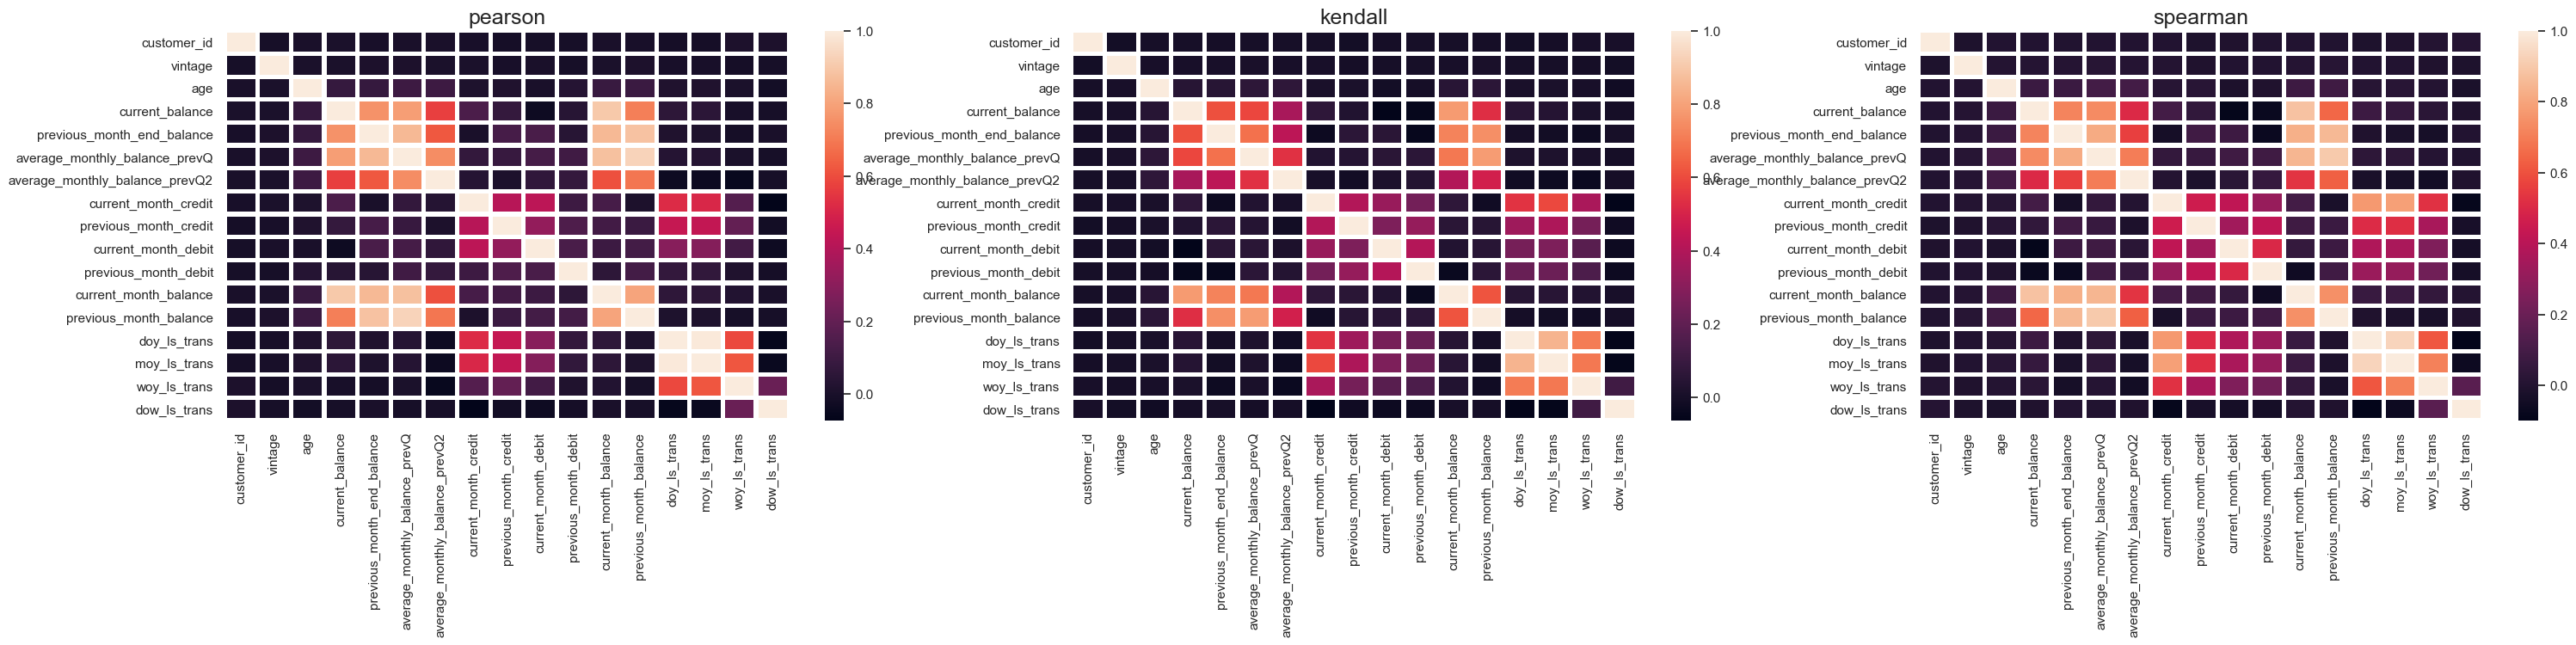

In [101]:
plt.figure(figsize = (36, 6), dpi = 100)

for i, j in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1, 3, i+1)
    correlation = numerical_data.dropna().corr(method = j)
    sns.heatmap(correlation, linewidth = 3)
    plt.title(j, fontsize = 18)

In [102]:
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

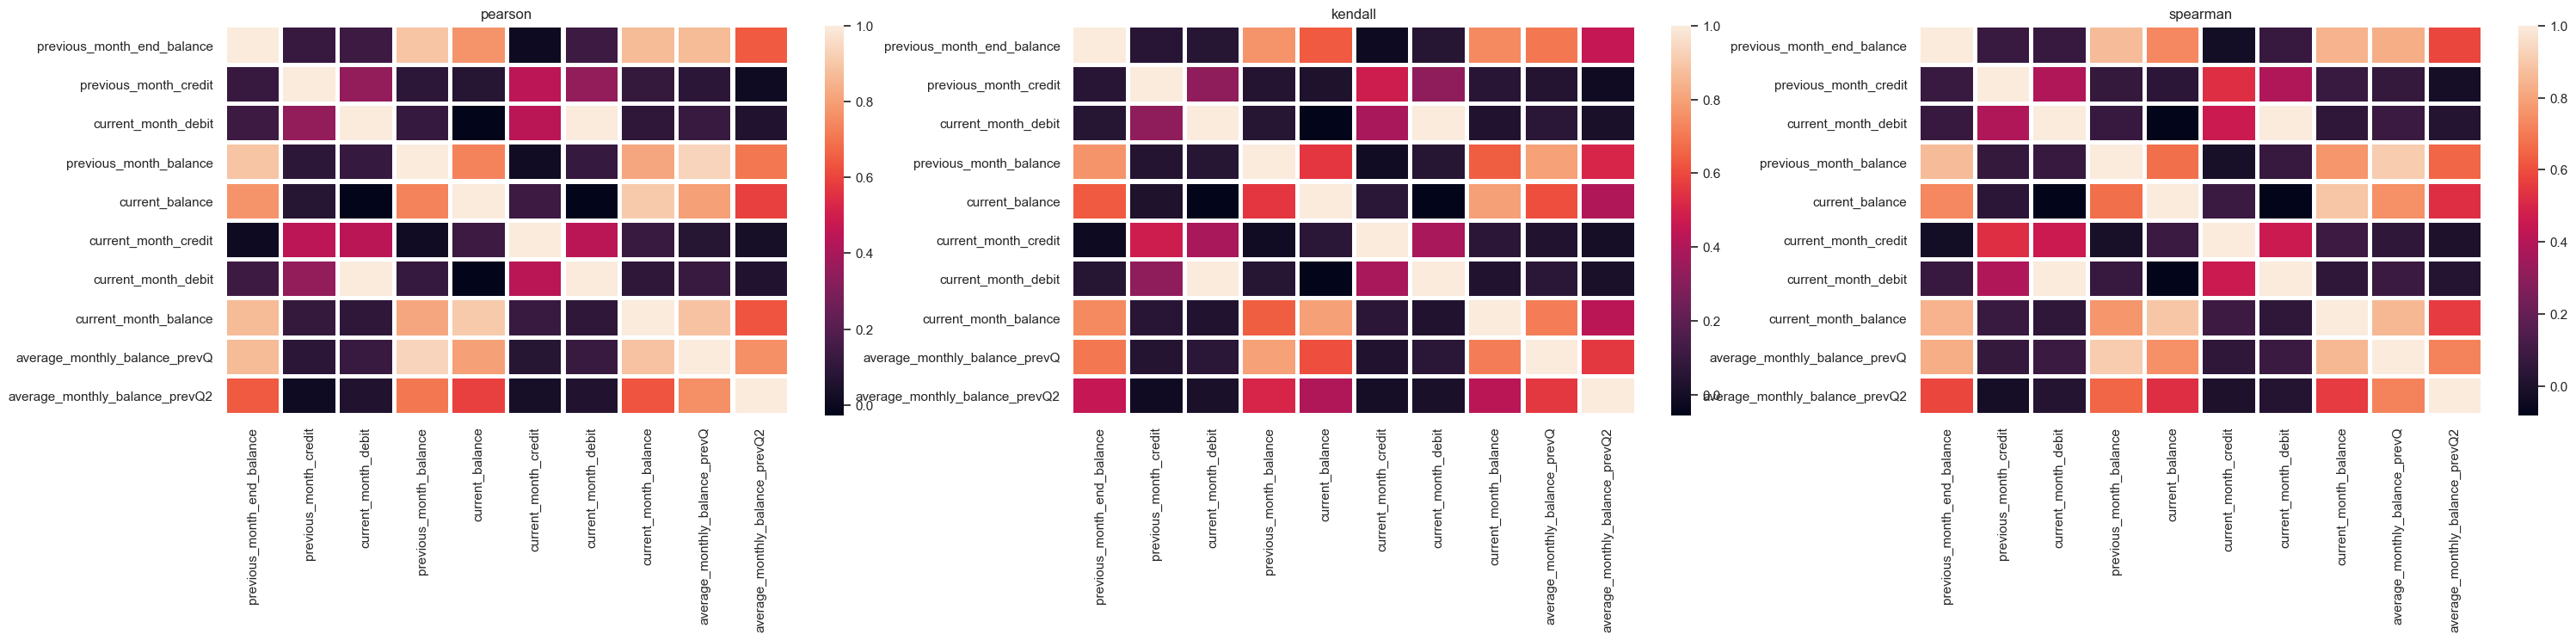

In [103]:
plt.figure(figsize = (36, 6), dpi = 100)
for i, j in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1, 3, i+1)
    correlation = numerical_data[var].dropna().corr(method = j)
    sns.heatmap(correlation, linewidth = 3)
    plt.title(j)

In [104]:
## inference
#variables lie previous month balance, previous_month debit/credit, current month balance have strong correlation among themselves
#balance variables also have high correlation among themselves
#debit/credit variables do not have strong correlation among themselves

In [105]:
## grouping variables
balance = ['previous_month_end_balance', 'previous_month_balance', 'current_balance', 'current_month_balance']
dc = ['current_month_debit', 'current_month_credit', 'previous_month_credit', 'previous_month_debit']

<Figure size 600x400 with 0 Axes>

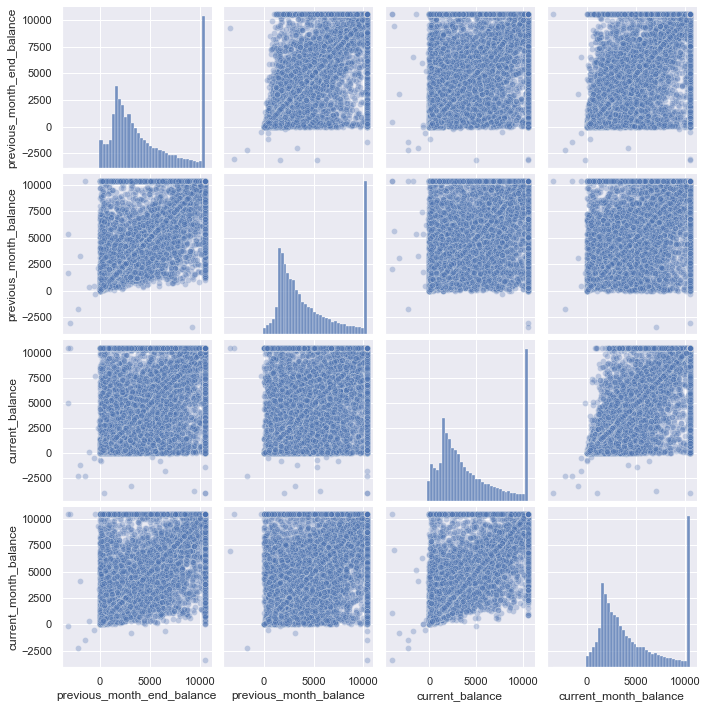

In [106]:
plt.figure(dpi = 100)
sns.pairplot(numerical_data[balance], plot_kws = {'alpha': 0.3})

In [107]:
#taking log to negate outliers
for col in var:
    mini = 1
    if numerical_data[col].min() < 0:
        mini = abs(numerical_data[col].min()) + 1
        
    numerical_data[col] = [i+mini for i in numerical_data[col]]
    numerical_data[col] = numerical_data[col].apply( lambda x: np.log(x))

<Figure size 600x400 with 0 Axes>

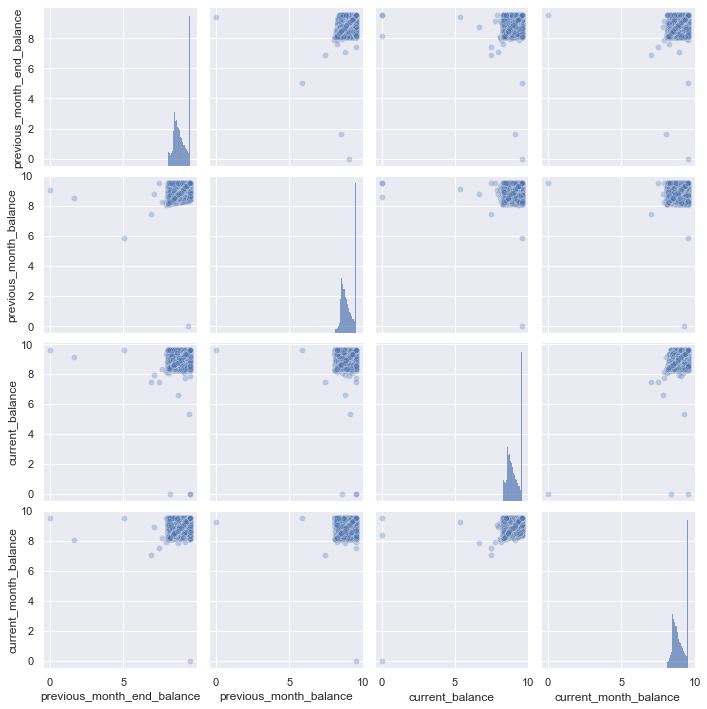

In [108]:
plt.figure(dpi = 100 )
sns.pairplot(numerical_data[balance], plot_kws = {'alpha': 0.3} )

In [109]:
' hypothesis '
' Are vintage customers less likely to churn '
' Are customers with higher bank balance less likely to churn'
' Are cutomers dropping monthly balance more likely to churn'

' Are cutomers dropping monthly balance more likely to churn'

In [110]:
#assuming that u1-u2 == 0
def TwoSampleZ(X1, X2, sigma1, sigma2, N1, N2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    over_sigma = sqrt(sigma1**2/N1+sigma2**2/N2)
    z = (X1-X2)/over_sigma
    pvalue = 2*(1-norm.cdf(abs(z)))
    return pvalue

In [111]:
def TwoSampleT(X1, X2, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    over_sd = sqrt(sd1**2/n1+sd2**2/n2)
    t = (X1-X2)/over_sd
    df = n1+n2-2
    p_val = 2*(1-t_dist.cdf(t, df))
    return p_val

In [112]:
def Bivariate_con_cat(data, cont, cat, category):
    #creating 2 samples
    X1 = data[cont][data[cat]==category][:]
    X2 = data[cont][~(data[cat]==category)][:]
    
    #calculating descriptives
    n1, n2 = X1.shape[0], X2.shape[0]
    m1, m2 = X1.mean(), X2.mean()
    std1, std2 = X1.std(), X2.std()
    print(n1, n2)
    #caculating p_values
    z_p_value = TwoSampleZ(m1, m2, std1, std2, n1, n2)
    t_p_value = TwoSampleT(m1, m2, std1, std2, n1, n2)
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc=np.mean)
    
    #plt.figure
    plt.figure(figsize = (15, 6), dpi = 140)

    #barplot
    plt.subplot(1, 2, 1)
    sns.barplot([str(category), 'not {}'.format(category)], [m1, m2])
    plt.xlabel(cat)
    plt.ylabel('mean {}'.format(cont))
    plt.title('z_test_pvalue = {}\n t_test_pvalue = {}\n {}'.format(z_p_value, t_p_value, table))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical Boxplot')

5260 23122


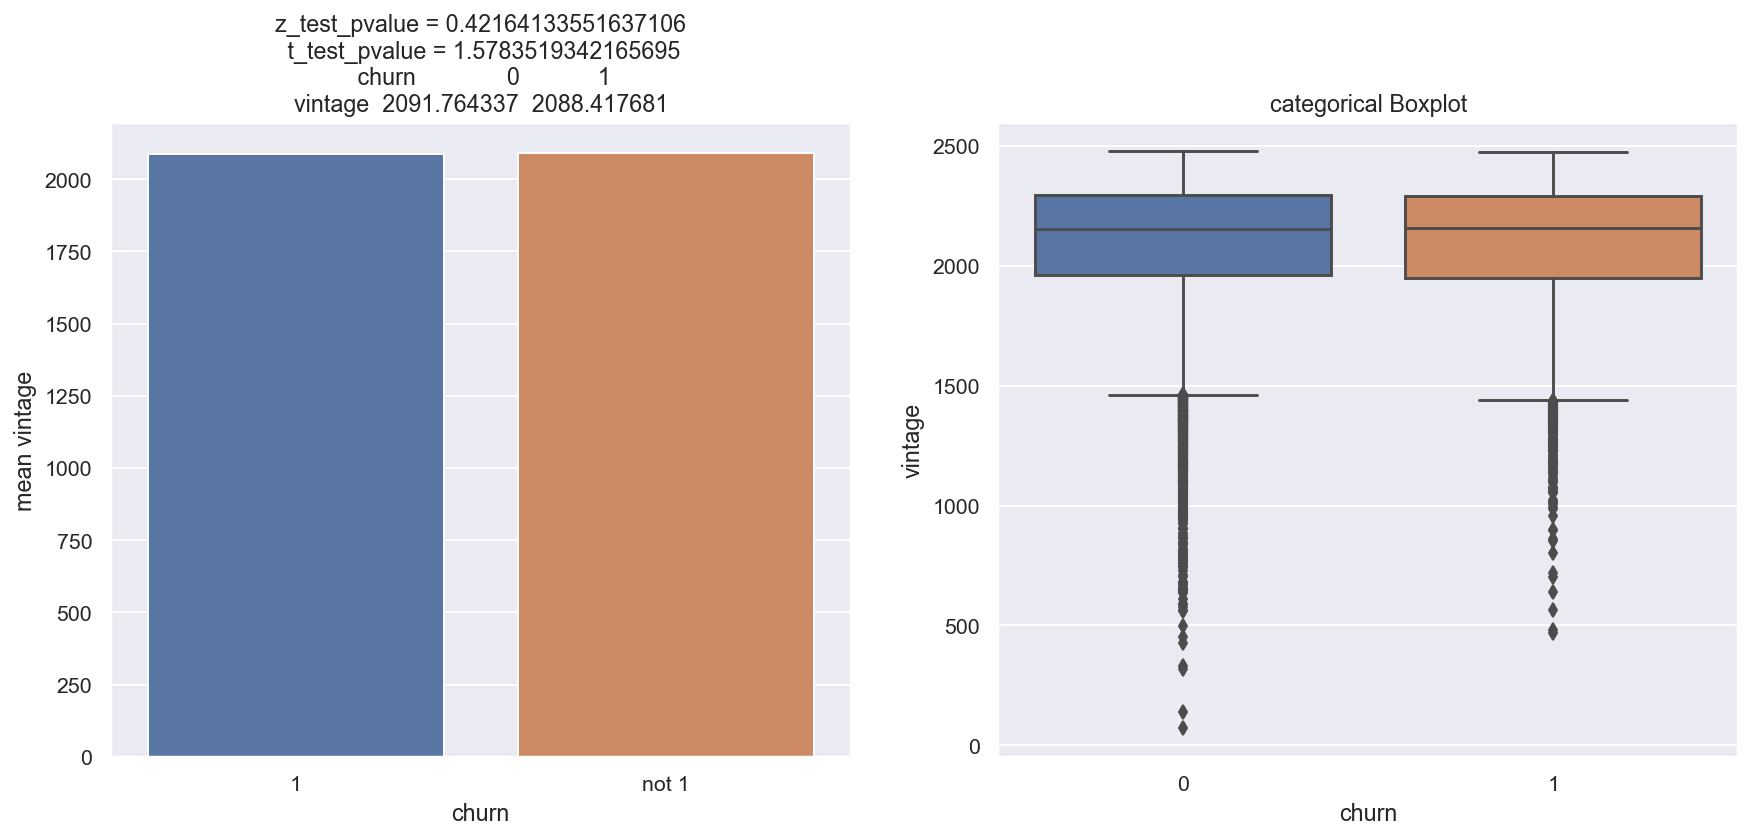

In [113]:
Bivariate_con_cat(data, 'vintage', 'churn', 1)

In [114]:
## We can accept our hypothesis that vintage customers are less likely to churn

5260 23122


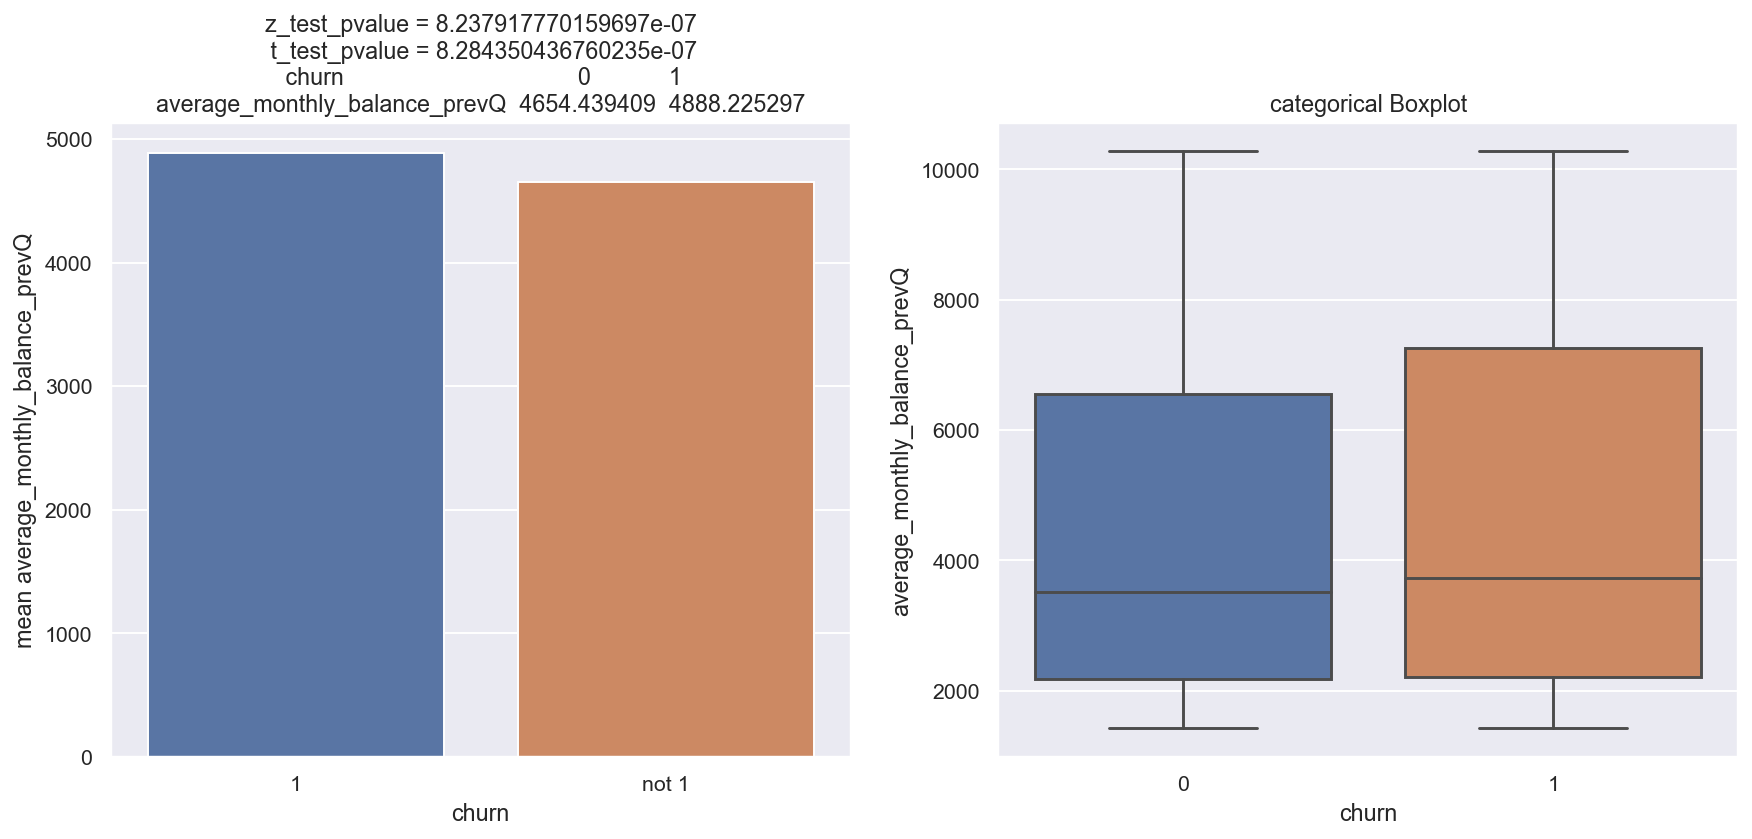

In [115]:
Bivariate_con_cat(data, 'average_monthly_balance_prevQ', 'churn', 1)

In [116]:
## The customers who have churned have higher monthly balance in the preceeding quarter

5260 23122


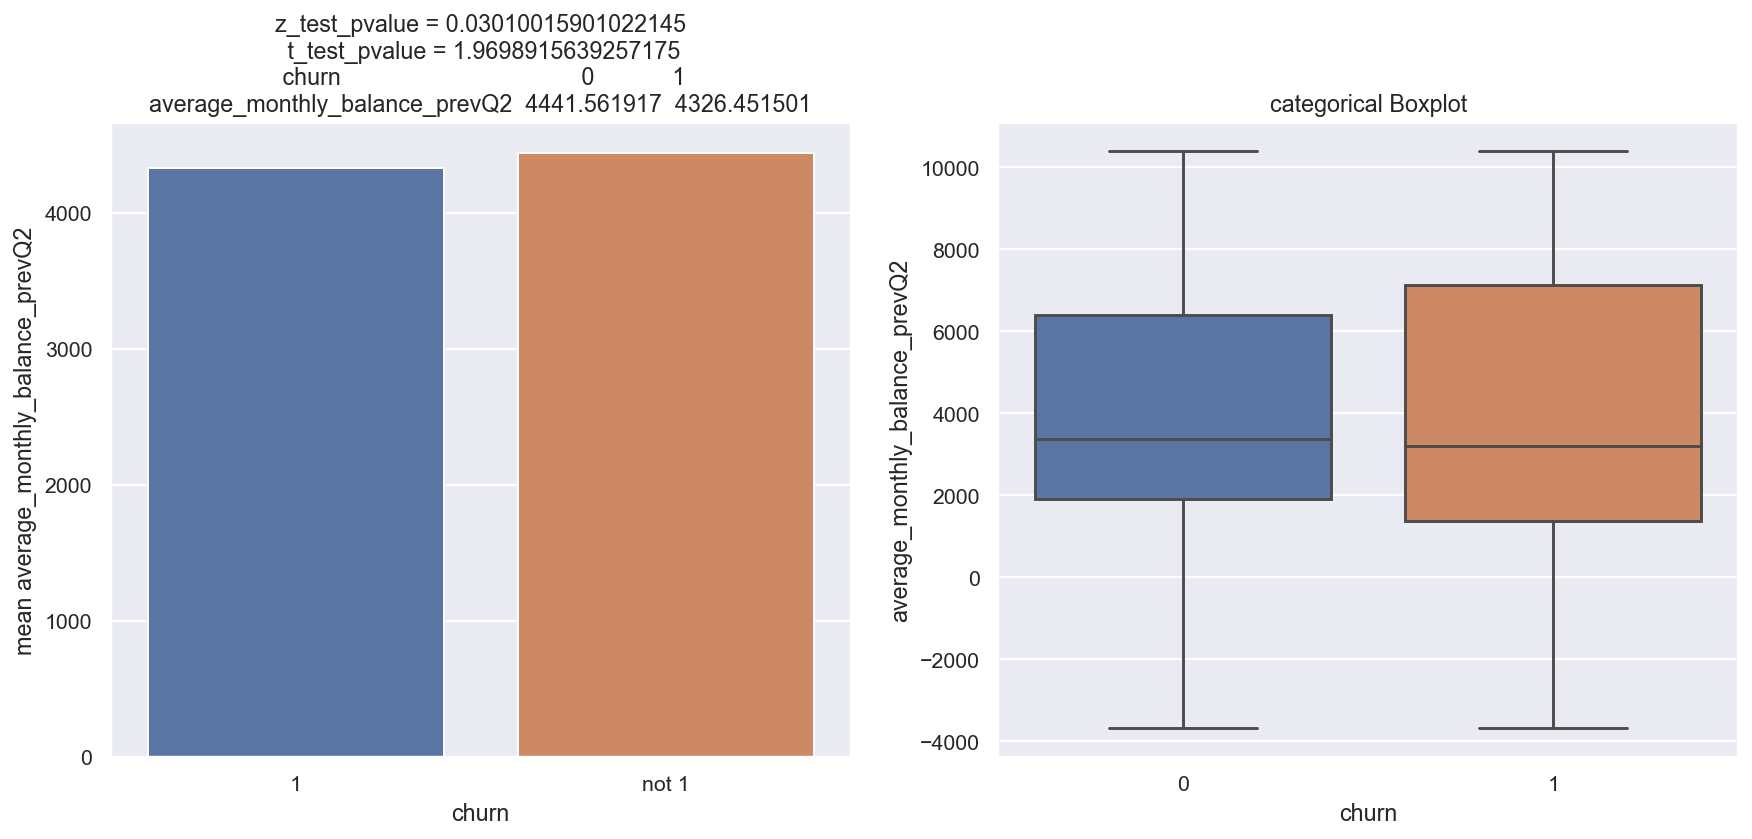

In [117]:
Bivariate_con_cat(data, 'average_monthly_balance_prevQ2', 'churn', 1)

In [118]:
## The customers who had churned have higher monthly balance in previous two quarters

5260 23122


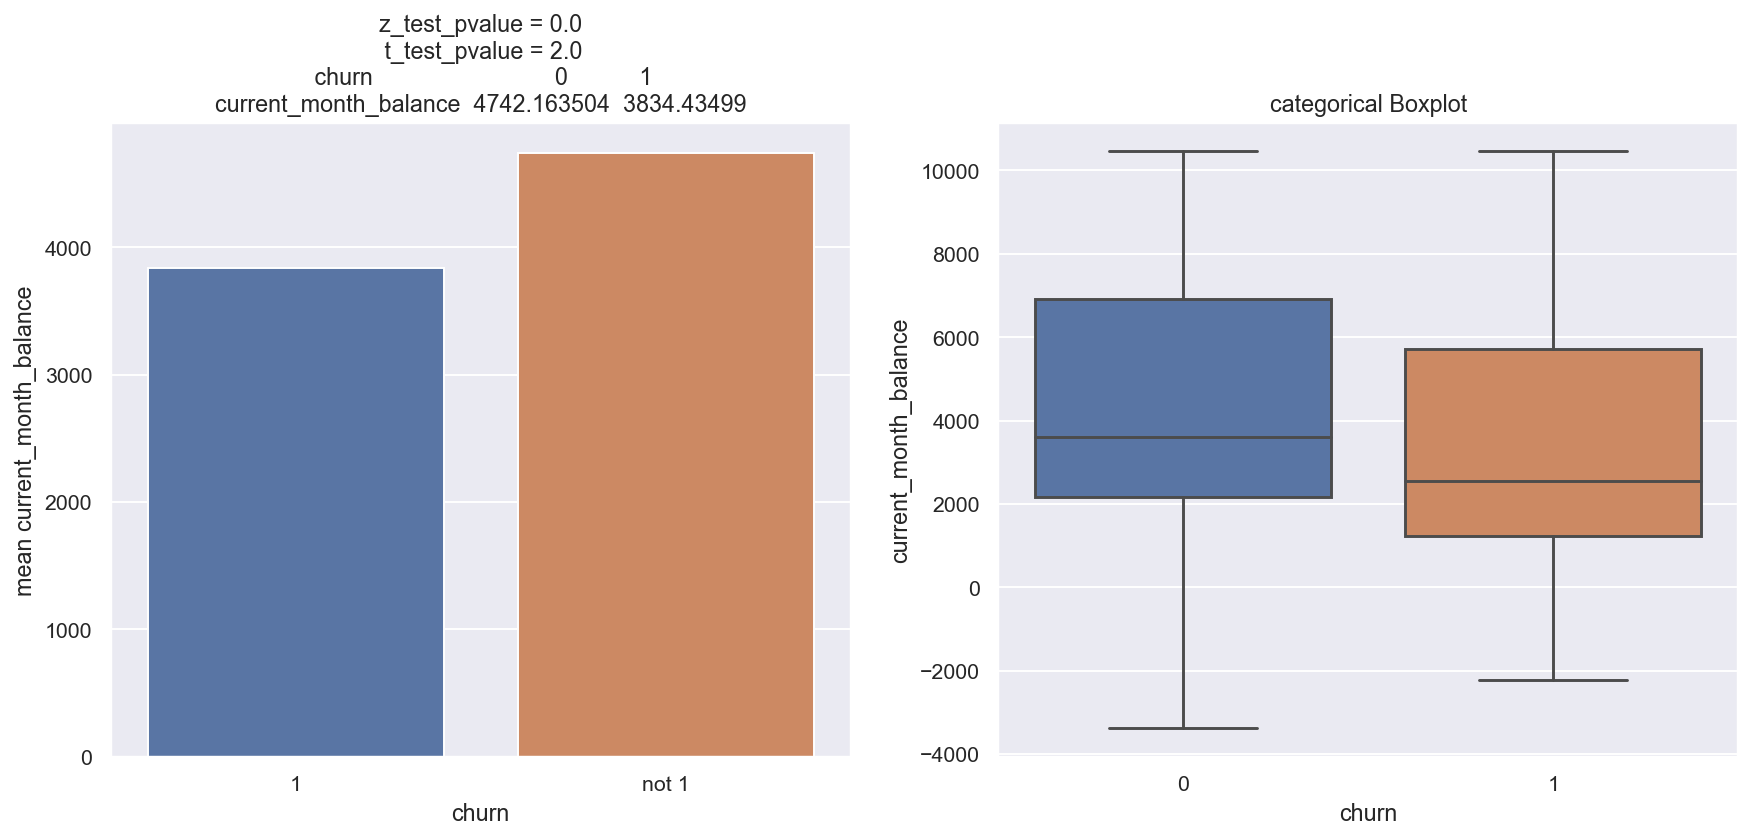

In [119]:
Bivariate_con_cat(data, 'current_month_balance', 'churn', 1)

In [120]:
# Extracting drop of balance in previous and current month
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

5260 23122


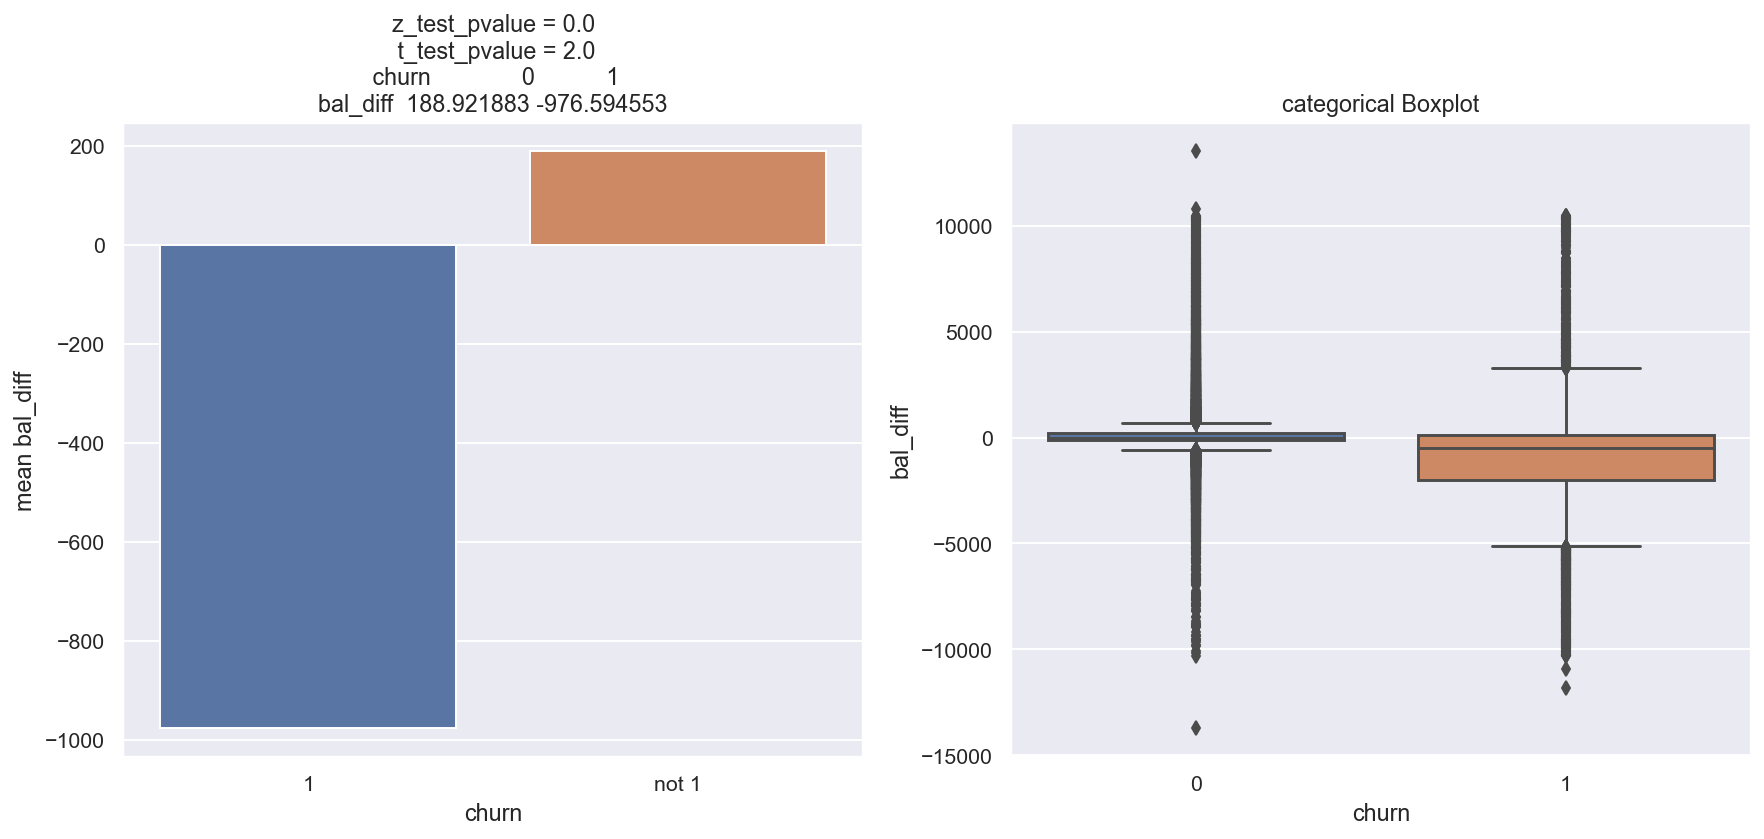

In [121]:
Bivariate_con_cat(difference, 'bal_diff', 'churn', 1)

In [122]:
## Customers who churned had a very high drop in their balance

In [123]:
## categorical-categorical analysis
'''
1) Are Females more likely to churn than males
2) Are young customers more likely to churn
3) Are customers in the lower income bracket more likely to churn
4) Are customers with dependent(s) more likely to churn
5) Are customers with average family size less than 4 more likely to churn
6) Customers with last transaction more than 6 months ago, Do they have higher churn rate
7) Possibility that cities and branch code with fewer accounts churn more.

            Relation between missing values and gender
            Does occupation have any relation with churn
            
'''

'\n1) Are Females more likely to churn than males\n2) Are young customers more likely to churn\n3) Are customers in the lower income bracket more likely to churn\n4) Are customers with dependent(s) more likely to churn\n5) Are customers with average family size less than 4 more likely to churn\n6) Customers with last transaction more than 6 months ago, Do they have higher churn rate\n7) Possibility that cities and branch code with fewer accounts churn more.\n\n            Relation between missing values and gender\n            Does occupation have any relation with churn\n            \n'

In [153]:
def BVA_categorical(data, tar, cat):
    
    #isolating variables
    data2 = data.loc[:, [tar, cat]]
    
    #forming cross tab
    table = pd.crosstab(data2[tar], data2[cat])
    f_obs = np.array([table.iloc[0][:].values, table.iloc[1][:].values])
    
    ##ch2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(f_obs)
    
    if p < 0.05:
        sig = True
    else:
        sig = False
    
    sns.countplot(x=cat, hue=tar, data=data2)
    plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))
    
    #plotting stacked percentage barplot
    ax = data2.groupby(cat)[tar].value_counts(normalize=True).unstack()
    ax.plot(kind='bar', stacked=True, title=str(ax))

 Are Females less likely to churn than Males?

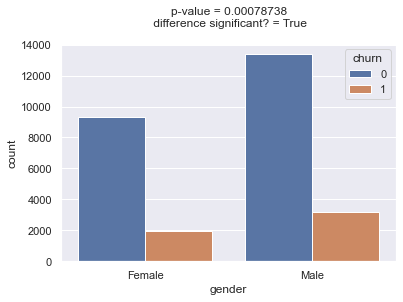

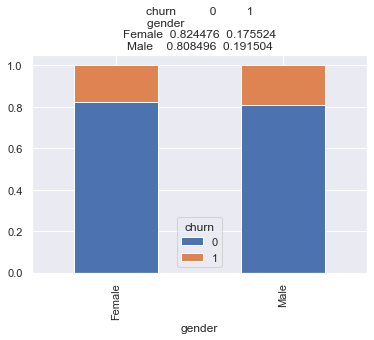

In [154]:
 BVA_categorical(data, 'churn', 'gender')

There is significant difference between the male and female customers churning.

ARE YOUNG CUSTOMERS MORE LIKELY TO CHURN

In [155]:
data2 = data.loc[:, ['churn', 'age']]
data2['age_group'] = 'str'
data2.loc[(data2.age>80), ['age_group']] = "very old"
data2.loc[(data2.age>60)&(data2.age<=80), ['age_group']] = 'retired'
data2.loc[(data2.age>18)&(data2.age<=60), ['age_group']] = 'adult'
data2.loc[(data2.age<=18), ['age_group']] = "young"

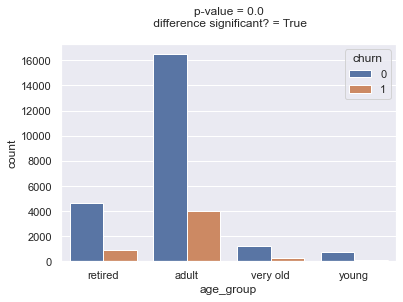

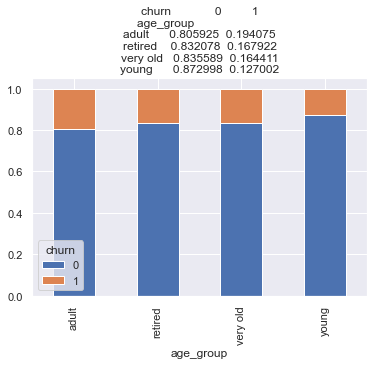

In [156]:
 BVA_categorical(data2, 'churn', 'age_group')

There is a significant difference among the different age groups in churning

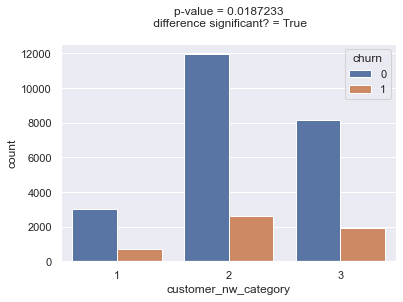

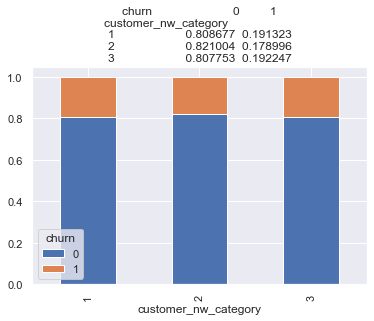

In [157]:
BVA_categorical(data, 'churn', 'customer_nw_category')

Different income category have significant effect on churn

CUSTOMERS WHOSE LAST TRANSACTION WAS MORE THAN 6 MONTHS AGO

In [187]:
def apply_trxn(x)->str:
    if x<7:
        return 'within 6 months'
    else:
        return 'more than 6 months ago'

In [188]:
data2 = data[['churn','moy_ls_trans']]
data.moy_ls_trans = data2.moy_ls_trans.apply(lambda x: apply_trxn(x))

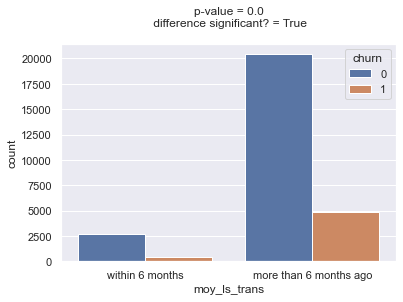

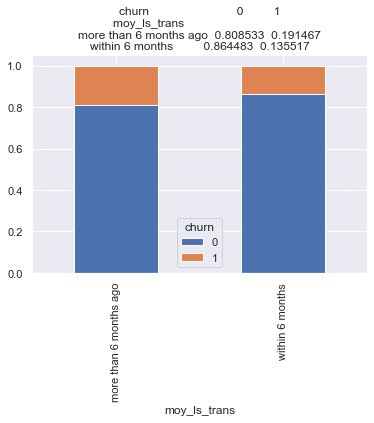

In [189]:
BVA_categorical(data, 'churn', 'moy_ls_trans')

In churning There is a significant difference between the people who made their last transaction in last 6 months and the customers who had their last transaction more than 6 months ago

In [192]:
data2 = data.city.value_counts()[:]
cities = data2[data2<280].index

In [201]:
data3 = data[['churn', 'city']][:]
data3['city_cat'] = 'str'
data3.loc[data3.city.isin(cities[:]), ['city_cat']]='low_number_of_accounts'
data3.loc[~data3.city.isin(cities[:]), ['city_cat']]='high_number_of_accounts'

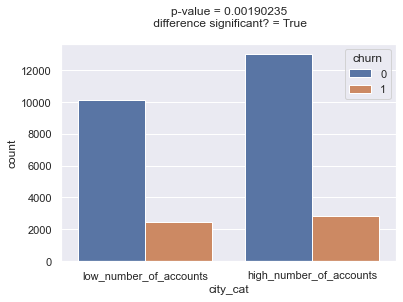

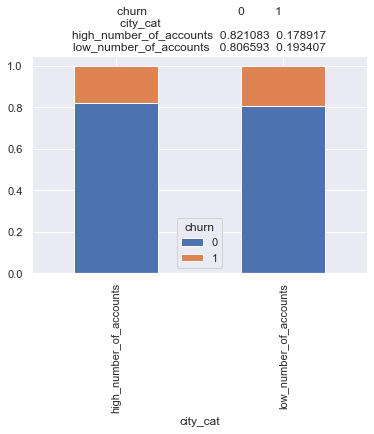

In [203]:
BVA_categorical(data3, 'churn', 'city_cat')

cities having less than one percent of the total accounts have higher churn rate

In [207]:
data2 = data.branch_code.value_counts()[:]
branch_codes = data2[data2<140].index

In [210]:
data3 = data[['churn','branch_code']][:]
data3['branch_code_category'] = 'str'
data3.loc[data3.branch_code.isin(branch_codes[:]), ['branch_code_category']]='low_number_of_accounts'
data3.loc[~data3.branch_code.isin(branch_codes[:]), ['branch_code_category']]='high_number_of_accounts'

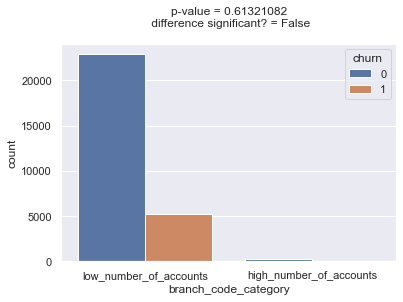

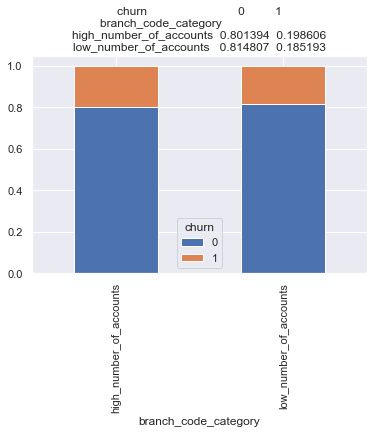

In [211]:
BVA_categorical(data3, 'churn', 'branch_code_category')

There is no significant difference between High account branches and Low Account branches in churning

Does Rows with missing values in gender have any significant impact on churn rate?

In [214]:
data2 = data[:]
data2['Missing/Non_missing_Category']='Missing Gender'
data2.loc[data2.gender.isin(['Male', 'Female']), 'Missing/Non_missing_Category']='Non_missing_gender'

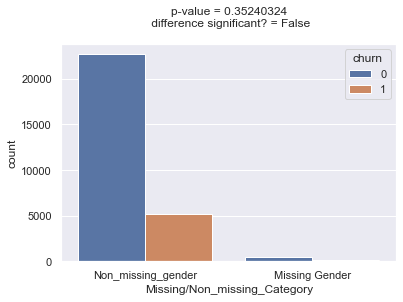

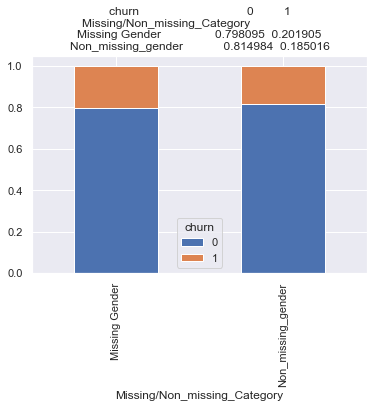

In [215]:
BVA_categorical(data2, 'churn', 'Missing/Non_missing_Category')

Presence of Missing values in gender have no significant impact on churn rate